# Regression for Numeric Data

__Team Members:__ Surya Suresh Sriraman, Nivetha Sivakumar, Aravind Raju

# Introduction

This work will explore a dataset which has more than 73,000 observations, each of which pertains to a particular NY State school district and associated subgroupings/categorizations of high school students who had been enrolled for at least 4 years as of the end of the 2018-2019 school year.

__Approach:__<br>
- __Develop Domain Knowledge:__ Gain an understanding of the educational landscape, variables, and factors influencing high school students' performance and enrollment in NY State school districts.
- __Data Loading:__ Utilize Python and the Pandas library to load the data into a suitable DataFrame.
- __Exploratory Data Analysis (EDA):__  Explore and analyze the dataset to identify patterns, trends, and relationships. This step involves data visualization, summary statistics, and initial insights to inform subsequent analyses.
- __Data Preparation:__ Clean and preprocess the data to handle missing values, outliers, and ensure it is in a suitable format for analysis. This step may involve feature engineering and encoding categorical variables.
- __Prep Data Review:__ Review the prepared dataset to ensure that transformations and preprocessing steps have been applied correctly. Confirm that the data is ready for modeling.
- __Regression Modelling:__ The dataset is split into training and testing subsets, and regression models like linear, Poisson, Negative Binomial are implemented, with coefficients interpreted to assess their intuitive sense, direction, magnitude, and consistency across models.
- __Select Best Performing Model:__ Evaluate and compare the performance of different regression models using appropriate metrics. Select the model that best fits the data and provides the most accurate predictions for high school student-related outcomes.

# Import libraries

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer
from scipy.stats import boxcox
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Loading Data

In [2]:
# Load data into Pandas DataFrame 
school_df = pd.read_csv(r"https://raw.githubusercontent.com/s-surya-s/DAV-6150/main/Project1_Data.csv", sep = ",", engine = 'python', na_values='-')

# sanity check - make sure data was read in as expected
school_df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91.0,14%,16.0,2%,30.0,5%,0.0,0%,148.0,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47.0,15%,2.0,1%,11.0,3%,0.0,0%,65.0,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44.0,13%,14.0,4%,19.0,6%,0.0,0%,83.0,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23.0,6%,10.0,3%,18.0,5%,0.0,0%,91.0,25%


# Exploratory Data Analysis

## Data Summary

In [3]:
school_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   report_school_year          73152 non-null  object 
 1   aggregation_index           73152 non-null  int64  
 2   aggregation_type            73152 non-null  object 
 3   aggregation_name            73152 non-null  object 
 4   nrc_code                    73152 non-null  int64  
 5   nrc_desc                    73152 non-null  object 
 6   county_code                 73152 non-null  int64  
 7   county_name                 73152 non-null  object 
 8   nyc_ind                     73152 non-null  int64  
 9   membership_desc             73152 non-null  object 
 10  subgroup_code               73152 non-null  int64  
 11  subgroup_name               73152 non-null  object 
 12  enroll_cnt                  39674 non-null  float64
 13  grad_cnt                    396

Code Columns are stored as numeric variables. We need to convert it to string values.

Percent values are stored as object because of thr '%' sign. We have to remove it and convert it into numeric value.

In [4]:
# Fix Data Types
obj_col =  ['aggregation_index', 'nrc_code', 'county_code', 'nyc_ind', 'subgroup_code']
school_df[obj_col] = school_df[obj_col].astype(object)

pct_col = ['grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct', 'still_enr_pct', 'ged_pct', 'dropout_pct']
school_df[pct_col] = school_df[pct_col].apply(lambda x: x.str.replace('%', '')).astype(float)

school_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   report_school_year          73152 non-null  object 
 1   aggregation_index           73152 non-null  object 
 2   aggregation_type            73152 non-null  object 
 3   aggregation_name            73152 non-null  object 
 4   nrc_code                    73152 non-null  object 
 5   nrc_desc                    73152 non-null  object 
 6   county_code                 73152 non-null  object 
 7   county_name                 73152 non-null  object 
 8   nyc_ind                     73152 non-null  object 
 9   membership_desc             73152 non-null  object 
 10  subgroup_code               73152 non-null  object 
 11  subgroup_name               73152 non-null  object 
 12  enroll_cnt                  39674 non-null  float64
 13  grad_cnt                    396

## Summary Statistics

In [5]:
num_cols = school_df.select_dtypes(include='float64').columns
cat_Cols = school_df.select_dtypes(include='object').columns

print('Numeric Columns')
display(school_df[num_cols].describe())
print('Category Columns')
display(school_df[cat_Cols].describe())

Numeric Columns


,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
count,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000
mean,192.120079,161.178354,84.406614,12.340903,8.479936,86.804708,43.371125,62.032742,32.577204,1.924485,1.742627,11.299516,5.190704,1.377577,0.612693,16.239225,7.963049
std,439.972474,361.294773,15.679500,32.046302,10.398486,225.795826,17.124891,132.777866,23.001197,6.498913,4.063987,40.766672,8.832710,4.949389,1.985445,50.129834,9.658698
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,20.000000,79.000000,1.000000,2.000000,10.000000,33.000000,4.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,66.000000,57.000000,89.000000,4.000000,6.000000,27.000000,43.000000,18.000000,31.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,3.000000,5.000000
75%,179.000000,156.000000,95.000000,10.000000,11.000000,69.000000,53.000000,62.000000,49.000000,2.000000,2.000000,5.000000,6.000000,1.000000,0.000000,9.000000,11.000000
max,9176.000000,7540.000000,100.000000,557.000000,100.000000,4752.000000,100.000000,2231.000000,100.000000,279.000000,67.000000,1381.000000,100.000000,97.000000,67.000000,1091.000000,100.000000


Category Columns


,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name
count,73152,73152,73152,73152,73152,73152,73152,73152,73152,73152,73152,73152
unique,1,1,1,680,6,6,62,62,2,6,24,24
top,2018-19,3,District,KINGSTON CITY SCHOOL DISTRICT,5,Average Needs,58,SUFFOLK,0,2015 Total Cohort - 4 Year Outcome,1,All Students
freq,73152,73152,73152,138,35322,35322,6526,6526,69110,12299,4074,4074


In [6]:
# Check Duplicates
'Duplicates Found' if school_df.duplicated().any() else 'No Duplicates'

'No Duplicates'

In [7]:
#Check Nulls
'Nulls Found' if school_df.isnull().sum().sum() != 0 else 'No Nulls'

'Nulls Found'

## Univariate Analysis

In [8]:
# Function for Univariate Analysis

def Univariate_EDA(df, col):
    '''
    Performs Univariate Analysis

    Args:
    - df: Dataframe for Univariate analysis
    - col: Column in the df for Univariate analysis

    Returns:
    None
    '''
    
    print('\n','-'*20, col,'-'*20)

    # Temporarily remove null values to view the distribution
    df = df[df[col].notnull()]
    
    # get summary statistics
    print('Summary Statistics')
    display(df[col].describe())
    
    if df[col].dtype == 'object':
        # Display unique values
        if len(df[col].unique())<=10:
            print('Unique Values')
            display(df[col].unique())
        else:
            print('Note: The graph displays only the top 20 frequent values')

        # Create a bar plot of the value counts
        plt.figure(figsize=(6, 5))
        plt.title(col)

        # Get value counts for the variable
        frequency = df[col].value_counts().head(20)
        sns.barplot(x=frequency.index, y=frequency.values, palette="viridis")
        plt.title(col)
        plt.ylabel("Counts")
        plt.tick_params(axis='x', rotation=90)

        # Display plot
        plt.tight_layout()
        plt.show()
        
        print("Insights:")
        print("The {} column is comprised of {} distinct categorical values, with the most frequently occurring value being '{}'".format(col, len(df[col].unique()),df[col].mode()[0]))
    
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':

        plt.figure(figsize=(6, 3))
        plt.suptitle(col)

        # Plot histogram
        plt.subplot(1, 2, 1)
        #sns.histplot(data=df, x=col, kde=True, color='skyblue')
        df[col].hist()

        # Plot boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x=col, color='green')

        # Display plot
        plt.tight_layout()
        plt.show()

        print("Insights:")
        # Check skewness and distribution
        if df[col].median() == df[col].mean():
            skewtext = 'the median equals the mean. Plot shows normal distribution.'
        elif df[col].median() > df[col].mean():
            skewtext = 'median exceeds mean. Plot shows left skewness.'
        else:
            skewtext = 'mean exceeds median. Plot shows right skewness.'

        print(f'Summary statistics, histogram, and boxplot indicate {skewtext}\nThe values range between {df[col].min()} and {df[col].max()}.')

        # Outliers detection
        q1 = np.quantile(df[col], 0.25)
        q3 = np.quantile(df[col], 0.75)
        iqr = q3 - q1
        upper_bound = q3 + (1.5 * iqr)
        lower_bound = q1 - (1.5 * iqr)
        outlier = (df[col] < lower_bound) | (df[col] > upper_bound)

        # Display outliers information
        if outlier.sum() > 0:
            print('Outliers Detected!')
            print('Outliers%: {}'.format(round(100 * outlier.mean(), 2)))

    return None


 -------------------- report_school_year --------------------
Summary Statistics


count       73152
unique          1
top       2018-19
freq        73152
Name: report_school_year, dtype: object

Unique Values


array(['2018-19'], dtype=object)

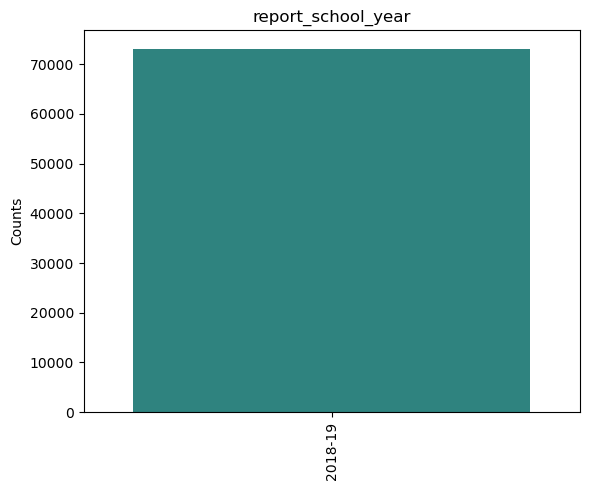

Insights:
The report_school_year column is comprised of 1 distinct categorical values, with the most frequently occurring value being '2018-19'

 -------------------- aggregation_index --------------------
Summary Statistics


count     73152
unique        1
top           3
freq      73152
Name: aggregation_index, dtype: int64

Unique Values


array([3], dtype=object)

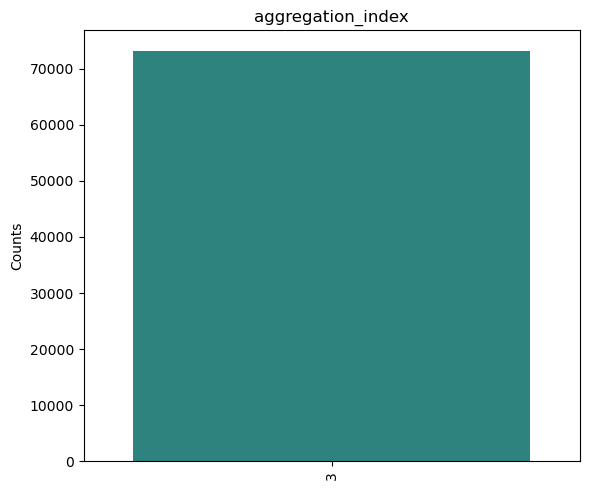

Insights:
The aggregation_index column is comprised of 1 distinct categorical values, with the most frequently occurring value being '3'

 -------------------- aggregation_type --------------------
Summary Statistics


count        73152
unique           1
top       District
freq         73152
Name: aggregation_type, dtype: object

Unique Values


array(['District'], dtype=object)

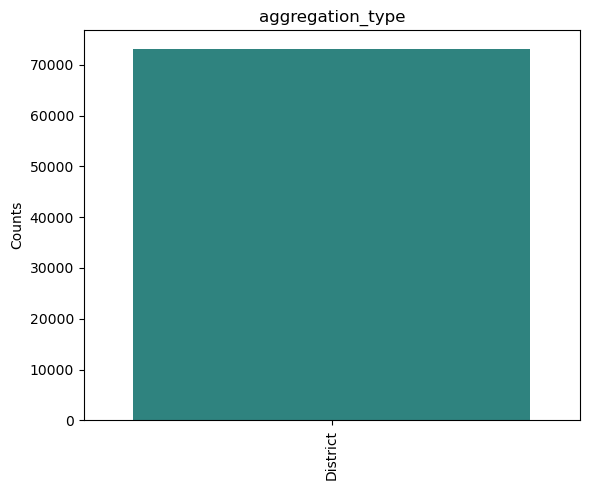

Insights:
The aggregation_type column is comprised of 1 distinct categorical values, with the most frequently occurring value being 'District'

 -------------------- aggregation_name --------------------
Summary Statistics


count                             73152
unique                              680
top       KINGSTON CITY SCHOOL DISTRICT
freq                                138
Name: aggregation_name, dtype: object

Note: The graph displays only the top 20 frequent values


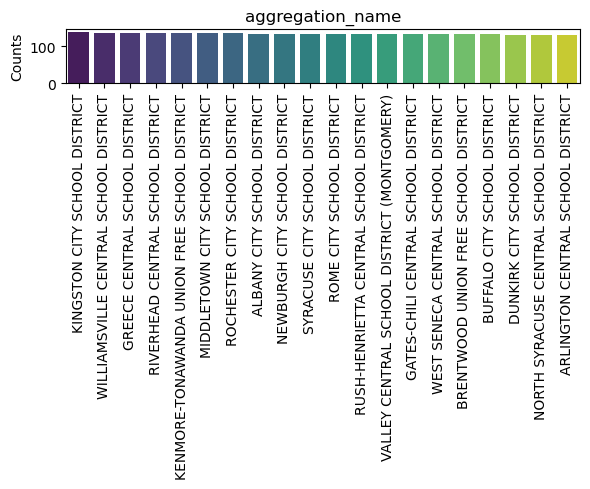

Insights:
The aggregation_name column is comprised of 680 distinct categorical values, with the most frequently occurring value being 'KINGSTON CITY SCHOOL DISTRICT'

 -------------------- nrc_code --------------------
Summary Statistics


count     73152
unique        6
top           5
freq      35322
Name: nrc_code, dtype: int64

Unique Values


array([3, 5, 6, 4, 2, 1], dtype=object)

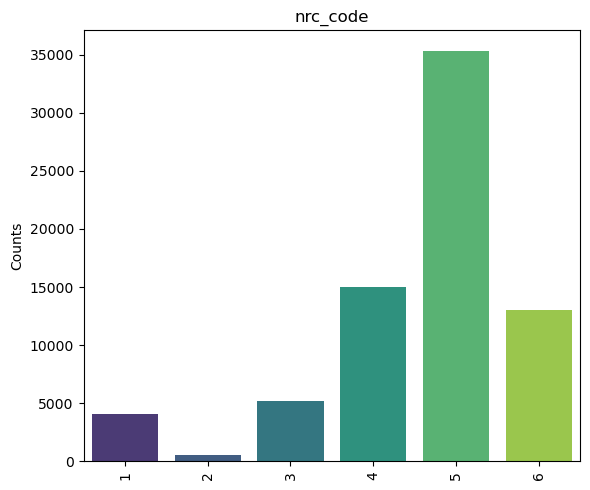

Insights:
The nrc_code column is comprised of 6 distinct categorical values, with the most frequently occurring value being '5'

 -------------------- nrc_desc --------------------
Summary Statistics


count             73152
unique                6
top       Average Needs
freq              35322
Name: nrc_desc, dtype: object

Unique Values


array(['Urban-Suburban High Needs', 'Average Needs', 'Low Needs',
       'Rural High Needs', 'Buffalo  Rochester  Yonkers  Syracuse', 'NYC'],
      dtype=object)

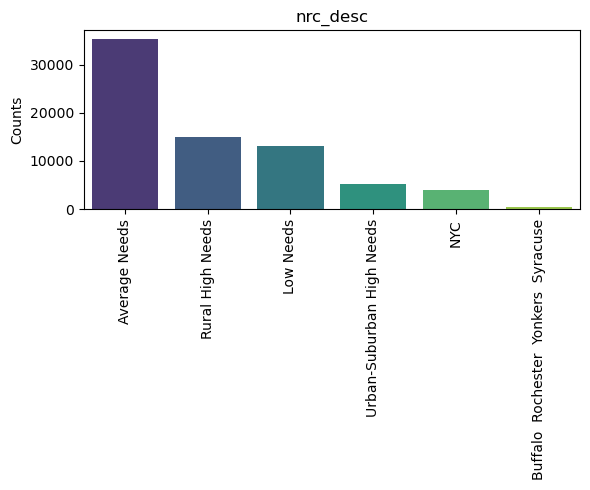

Insights:
The nrc_desc column is comprised of 6 distinct categorical values, with the most frequently occurring value being 'Average Needs'

 -------------------- county_code --------------------
Summary Statistics


count     73152
unique       62
top          58
freq       6526
Name: county_code, dtype: int64

Note: The graph displays only the top 20 frequent values


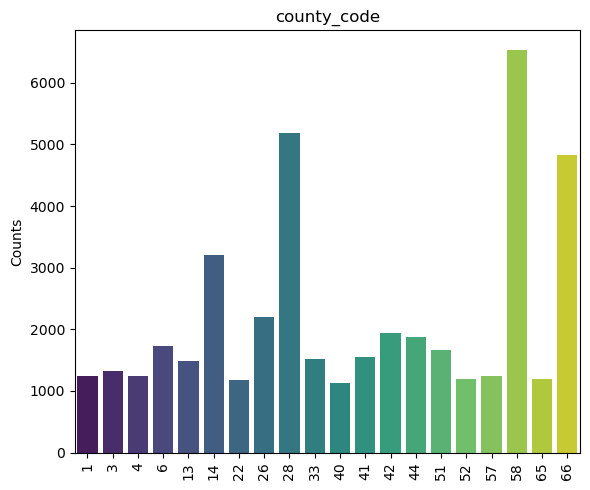

Insights:
The county_code column is comprised of 62 distinct categorical values, with the most frequently occurring value being '58'

 -------------------- county_name --------------------
Summary Statistics


count       73152
unique         62
top       SUFFOLK
freq         6526
Name: county_name, dtype: object

Note: The graph displays only the top 20 frequent values


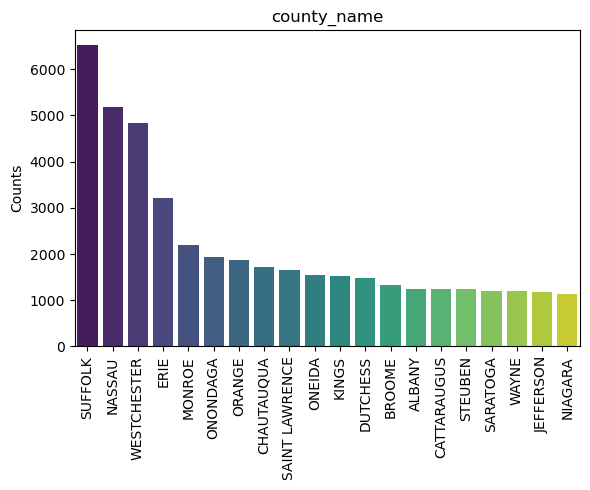

Insights:
The county_name column is comprised of 62 distinct categorical values, with the most frequently occurring value being 'SUFFOLK'

 -------------------- nyc_ind --------------------
Summary Statistics


count     73152
unique        2
top           0
freq      69110
Name: nyc_ind, dtype: int64

Unique Values


array([0, 1], dtype=object)

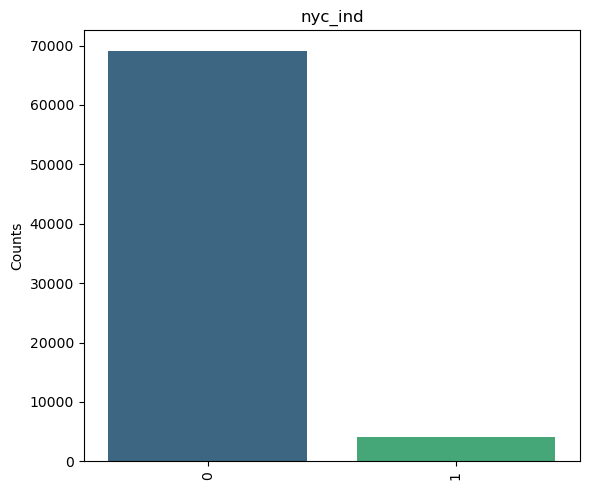

Insights:
The nyc_ind column is comprised of 2 distinct categorical values, with the most frequently occurring value being '0'

 -------------------- membership_desc --------------------
Summary Statistics


count                                  73152
unique                                     6
top       2015 Total Cohort - 4 Year Outcome
freq                                   12299
Name: membership_desc, dtype: object

Unique Values


array(['2013 Total Cohort - 6 Year Outcome',
       '2014 Total Cohort - 5 Year Outcome',
       '2015 Total Cohort - 4 Year Outcome',
       '2014 Total Cohort - 5 Year Outcome - August 2019',
       '2015 Total Cohort - 4 Year Outcome - August 2019',
       '2013 Total Cohort - 6 Year Outcome - August 2019'], dtype=object)

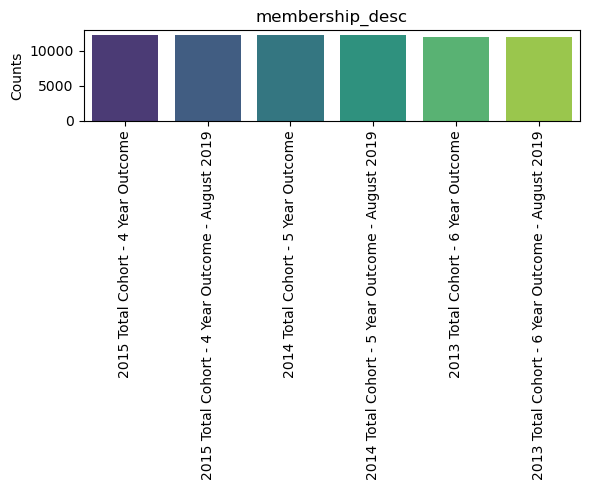

Insights:
The membership_desc column is comprised of 6 distinct categorical values, with the most frequently occurring value being '2015 Total Cohort - 4 Year Outcome'

 -------------------- subgroup_code --------------------
Summary Statistics


count     73152
unique       24
top           1
freq       4074
Name: subgroup_code, dtype: int64

Note: The graph displays only the top 20 frequent values


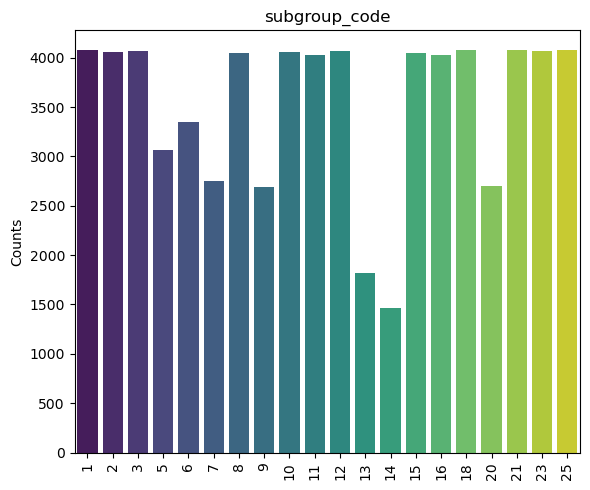

Insights:
The subgroup_code column is comprised of 24 distinct categorical values, with the most frequently occurring value being '1'

 -------------------- subgroup_name --------------------
Summary Statistics


count            73152
unique              24
top       All Students
freq              4074
Name: subgroup_name, dtype: object

Note: The graph displays only the top 20 frequent values


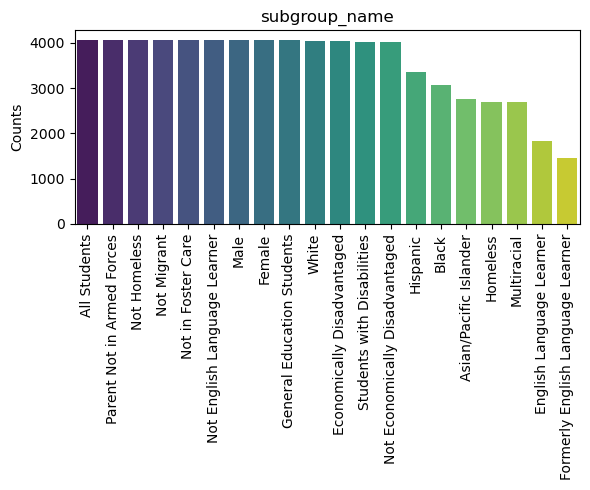

Insights:
The subgroup_name column is comprised of 24 distinct categorical values, with the most frequently occurring value being 'All Students'

 -------------------- enroll_cnt --------------------
Summary Statistics


count    39674.000000
mean       192.120079
std        439.972474
min          5.000000
25%         25.000000
50%         66.000000
75%        179.000000
max       9176.000000
Name: enroll_cnt, dtype: float64

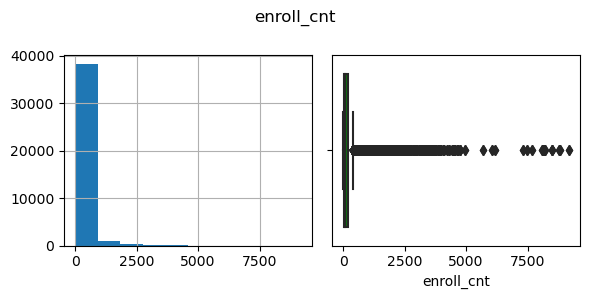

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 5.0 and 9176.0.
Outliers Detected!
Outliers%: 9.98

 -------------------- grad_cnt --------------------
Summary Statistics


count    39674.000000
mean       161.178354
std        361.294773
min          0.000000
25%         20.000000
50%         57.000000
75%        156.000000
max       7540.000000
Name: grad_cnt, dtype: float64

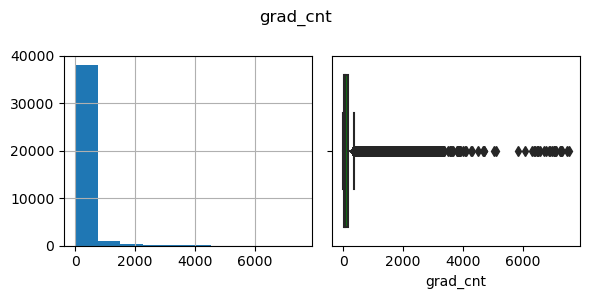

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 7540.0.
Outliers Detected!
Outliers%: 9.79

 -------------------- grad_pct --------------------
Summary Statistics


count    39674.000000
mean        84.406614
std         15.679500
min          0.000000
25%         79.000000
50%         89.000000
75%         95.000000
max        100.000000
Name: grad_pct, dtype: float64

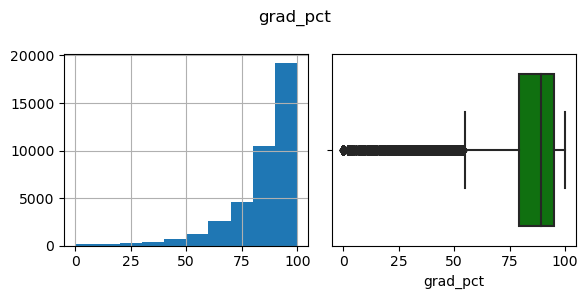

Insights:
Summary statistics, histogram, and boxplot indicate median exceeds mean. Plot shows left skewness.
The values range between 0.0 and 100.0.
Outliers Detected!
Outliers%: 5.59

 -------------------- local_cnt --------------------
Summary Statistics


count    39674.000000
mean        12.340903
std         32.046302
min          0.000000
25%          1.000000
50%          4.000000
75%         10.000000
max        557.000000
Name: local_cnt, dtype: float64

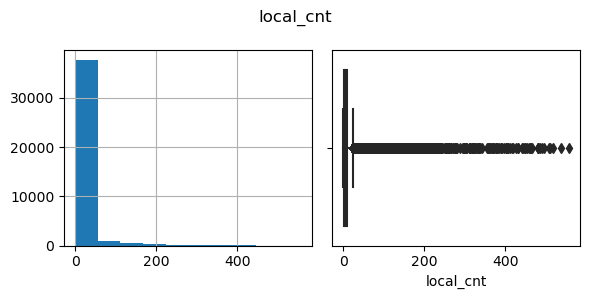

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 557.0.
Outliers Detected!
Outliers%: 10.41

 -------------------- local_pct --------------------
Summary Statistics


count    39674.000000
mean         8.479936
std         10.398486
min          0.000000
25%          2.000000
50%          6.000000
75%         11.000000
max        100.000000
Name: local_pct, dtype: float64

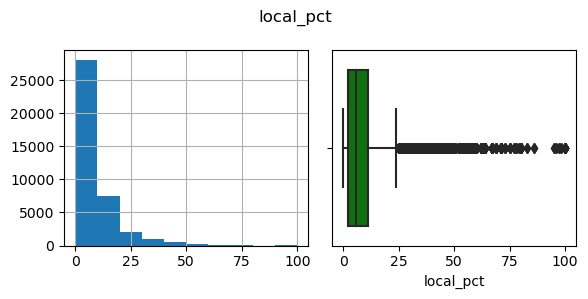

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 100.0.
Outliers Detected!
Outliers%: 7.33

 -------------------- reg_cnt --------------------
Summary Statistics


count    39674.000000
mean        86.804708
std        225.795826
min          0.000000
25%         10.000000
50%         27.000000
75%         69.000000
max       4752.000000
Name: reg_cnt, dtype: float64

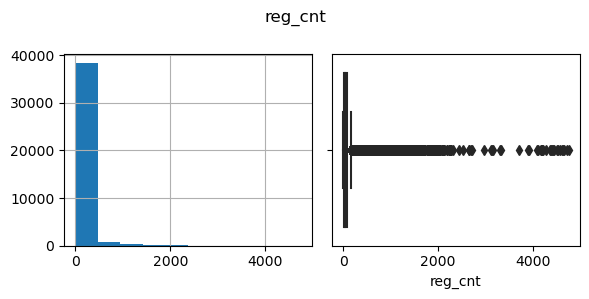

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 4752.0.
Outliers Detected!
Outliers%: 10.82

 -------------------- reg_pct --------------------
Summary Statistics


count    39674.000000
mean        43.371125
std         17.124891
min          0.000000
25%         33.000000
50%         43.000000
75%         53.000000
max        100.000000
Name: reg_pct, dtype: float64

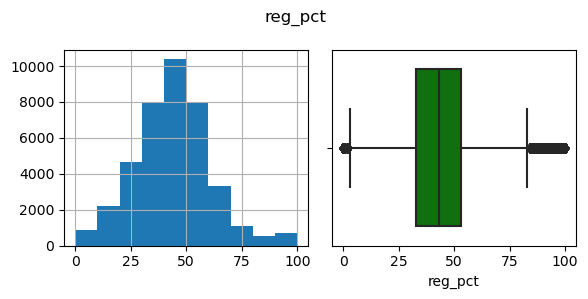

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 100.0.
Outliers Detected!
Outliers%: 3.27

 -------------------- reg_adv_cnt --------------------
Summary Statistics


count    39674.000000
mean        62.032742
std        132.777866
min          0.000000
25%          4.000000
50%         18.000000
75%         62.000000
max       2231.000000
Name: reg_adv_cnt, dtype: float64

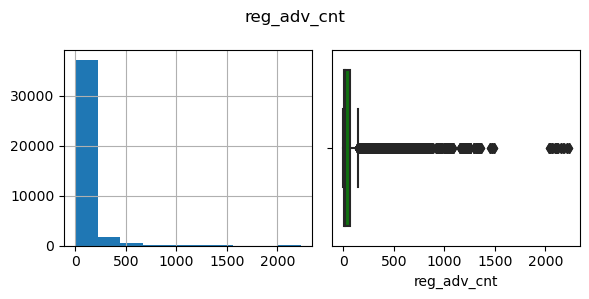

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 2231.0.
Outliers Detected!
Outliers%: 10.93

 -------------------- reg_adv_pct --------------------
Summary Statistics


count    39674.000000
mean        32.577204
std         23.001197
min          0.000000
25%         14.000000
50%         31.000000
75%         49.000000
max        100.000000
Name: reg_adv_pct, dtype: float64

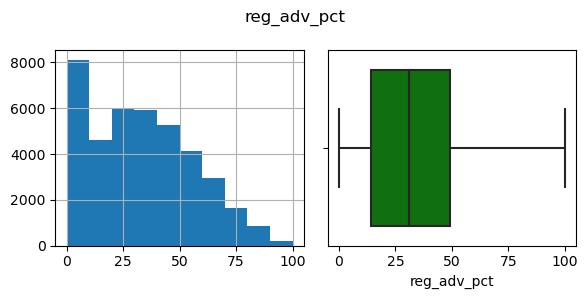

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 100.0.

 -------------------- non_diploma_credential_cnt --------------------
Summary Statistics


count    39674.000000
mean         1.924485
std          6.498913
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        279.000000
Name: non_diploma_credential_cnt, dtype: float64

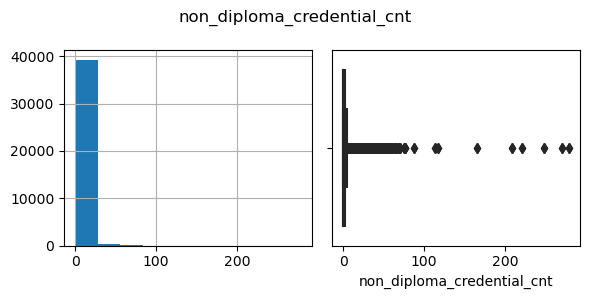

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 279.0.
Outliers Detected!
Outliers%: 7.62

 -------------------- non_diploma_credential_pct --------------------
Summary Statistics


count    39674.000000
mean         1.742627
std          4.063987
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         67.000000
Name: non_diploma_credential_pct, dtype: float64

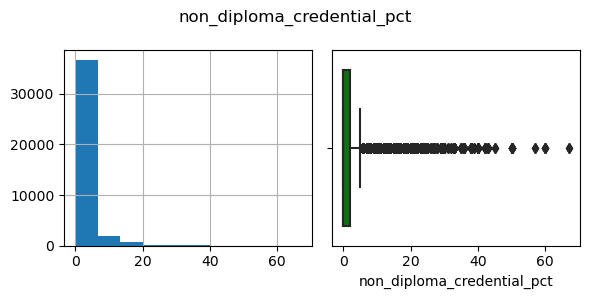

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 67.0.
Outliers Detected!
Outliers%: 8.8

 -------------------- still_enr_cnt --------------------
Summary Statistics


count    39674.000000
mean        11.299516
std         40.766672
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max       1381.000000
Name: still_enr_cnt, dtype: float64

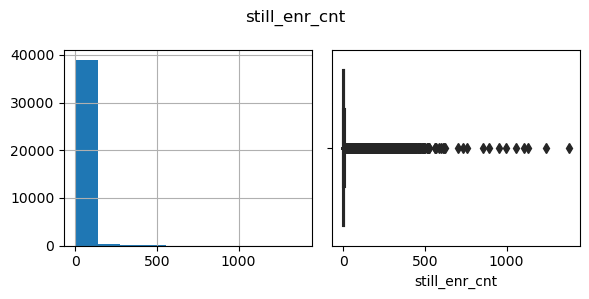

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 1381.0.
Outliers Detected!
Outliers%: 14.4

 -------------------- still_enr_pct --------------------
Summary Statistics


count    39674.000000
mean         5.190704
std          8.832710
min          0.000000
25%          0.000000
50%          2.000000
75%          6.000000
max        100.000000
Name: still_enr_pct, dtype: float64

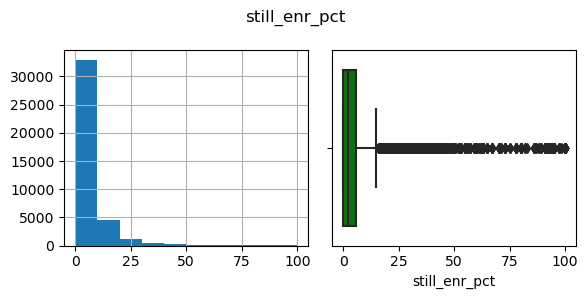

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 100.0.
Outliers Detected!
Outliers%: 8.13

 -------------------- ged_cnt --------------------
Summary Statistics


count    39674.000000
mean         1.377577
std          4.949389
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         97.000000
Name: ged_cnt, dtype: float64

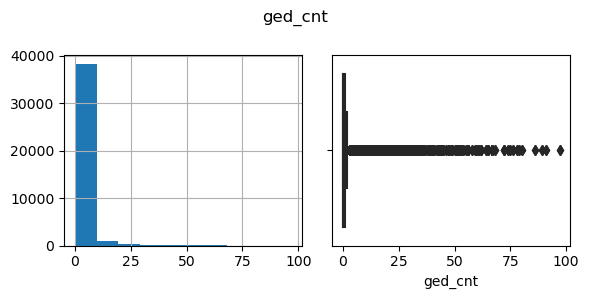

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 97.0.
Outliers Detected!
Outliers%: 11.79

 -------------------- ged_pct --------------------
Summary Statistics


count    39674.000000
mean         0.612693
std          1.985445
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         67.000000
Name: ged_pct, dtype: float64

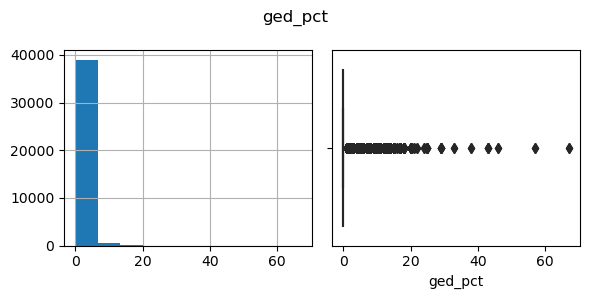

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 67.0.
Outliers Detected!
Outliers%: 22.51

 -------------------- dropout_cnt --------------------
Summary Statistics


count    39674.000000
mean        16.239225
std         50.129834
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max       1091.000000
Name: dropout_cnt, dtype: float64

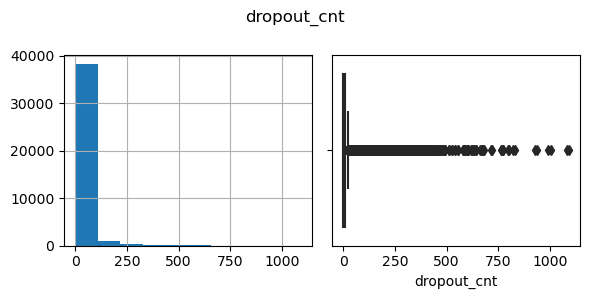

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 1091.0.
Outliers Detected!
Outliers%: 12.91

 -------------------- dropout_pct --------------------
Summary Statistics


count    39674.000000
mean         7.963049
std          9.658698
min          0.000000
25%          1.000000
50%          5.000000
75%         11.000000
max        100.000000
Name: dropout_pct, dtype: float64

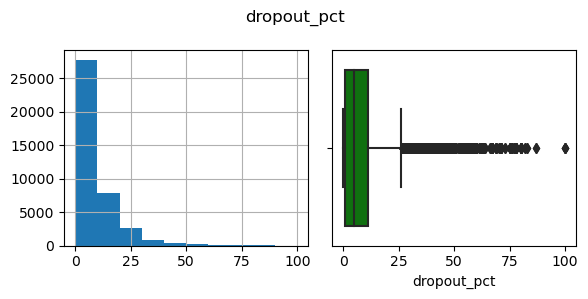

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 100.0.
Outliers Detected!
Outliers%: 4.86


In [9]:
for col in school_df.columns:    
    Univariate_EDA(school_df, col)

## Bivariate Analysis

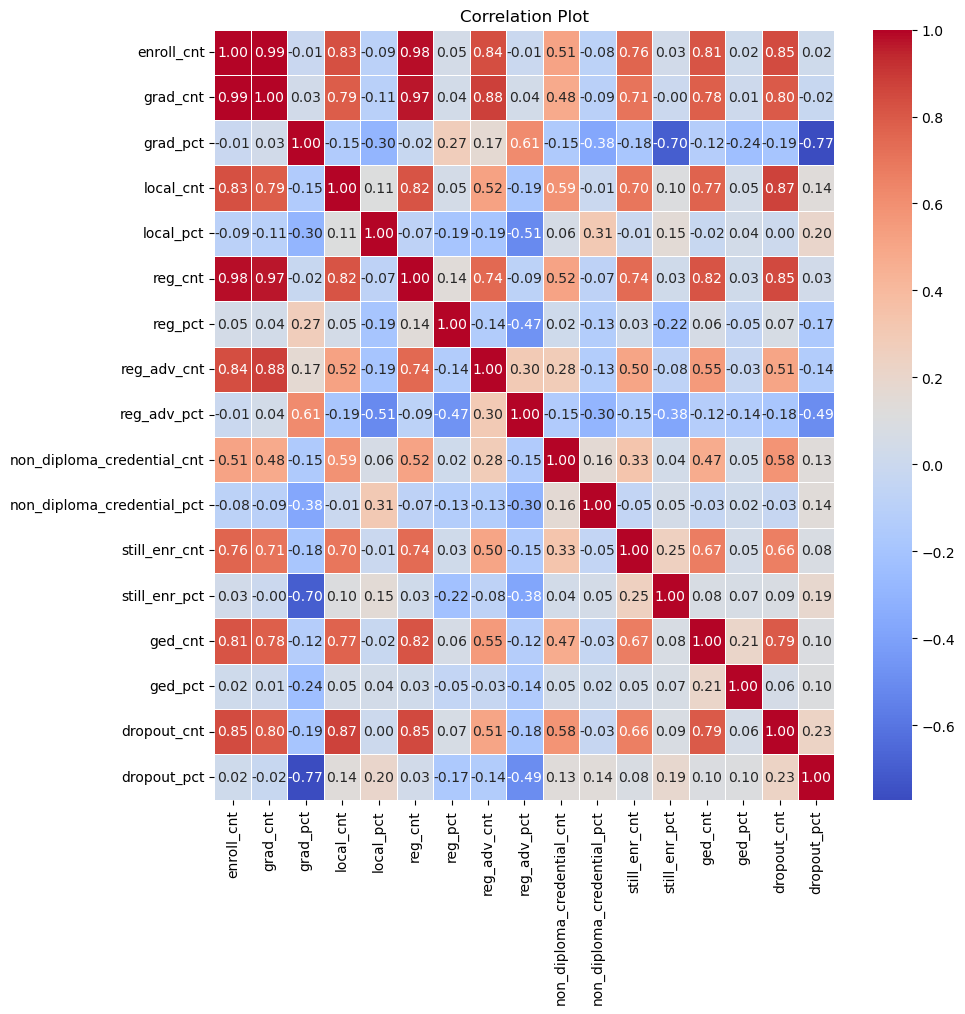

In [10]:
# Calculate the correlation matrix
correlation_matrix = school_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot')
plt.show()

__Insights:__ 

We can observe that the count variables are highly correlated with the target variable

In [11]:
def cat_vs_num (df, num, cat):
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=cat, y=num, data=df)
    plt.title(cat+' vs '+num)
    plt.xticks(rotation=90)
    plt.show()

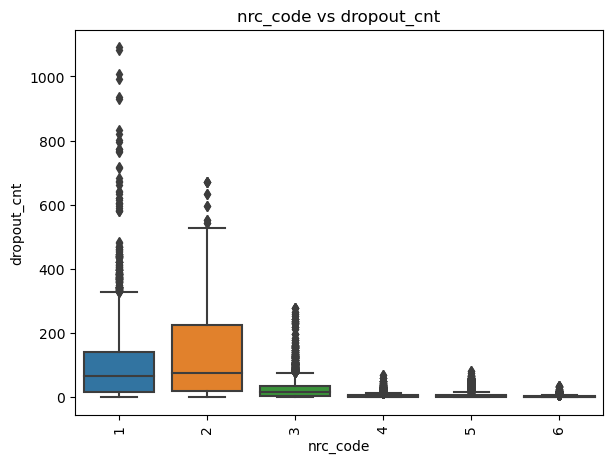

In [12]:
cat_vs_num (school_df, 'dropout_cnt', 'nrc_code')

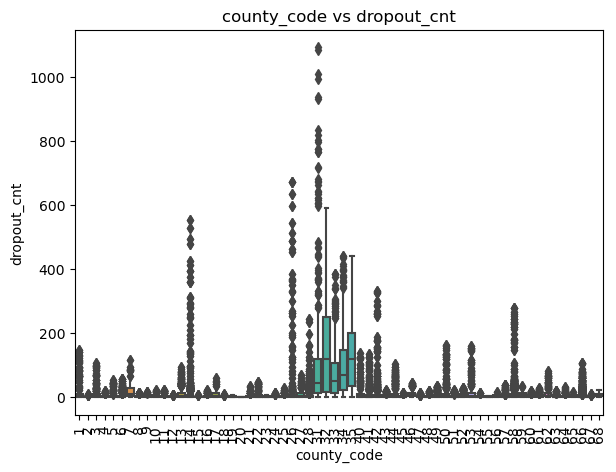

In [13]:
cat_vs_num (school_df, 'dropout_cnt', 'county_code')

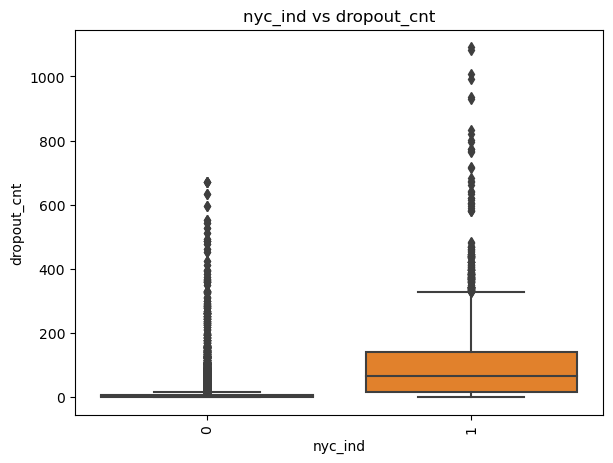

In [14]:
cat_vs_num (school_df, 'dropout_cnt', 'nyc_ind')

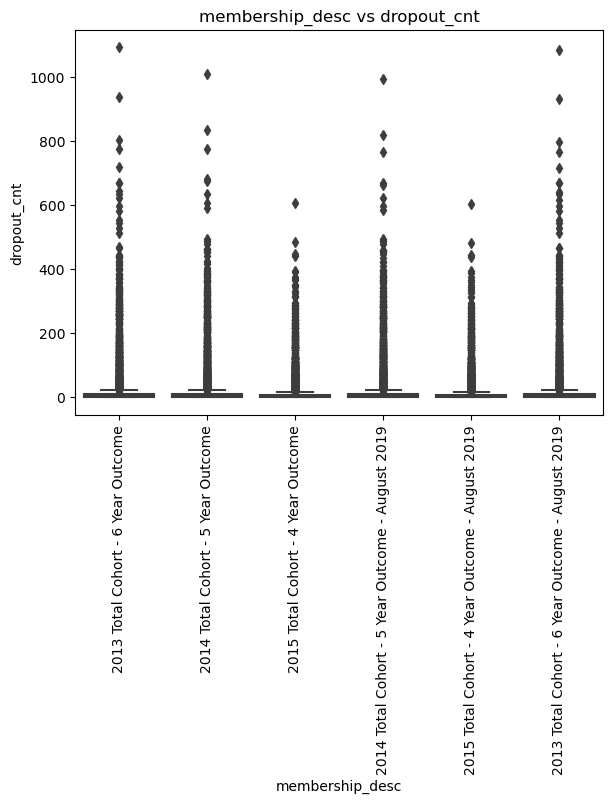

In [15]:
cat_vs_num (school_df, 'dropout_cnt', 'membership_desc')

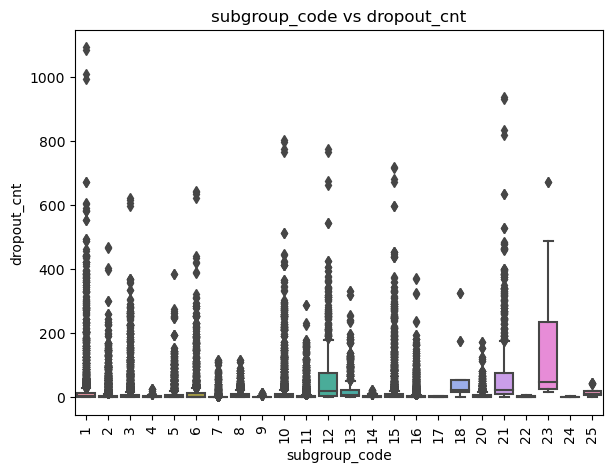

In [16]:
cat_vs_num (school_df, 'dropout_cnt', 'subgroup_code')

__Insights:__

The values are spread across categories. It is mostly right skewed and contains outliers.

# Data Cleaning

## Handling unwanted columns

- The columns "report_school_year," "aggregation_index," and "aggregation_type" have the same value throughout the entire column. Therefore, these columns can be dropped. 

- The columns like nrc_code, nrc_desc shows redundant value. So the code columns are dropped.

- The pct columns are providing same information as count columns, for example we can obtain grad_pct by just dividing grad_cnt by enroll_cnt. Since the values are redundant we can drop the pct columns. Also, pct columns are not correlated with the target variable whereas cnt columns are correlated with the target variable..

- Additionally, "dropout_pct" should be removed as it contains redundant information related to the target column and could potentially lead to data leakage.

In [17]:
school_df_bup = school_df.copy()

school_df.drop(columns= ['report_school_year', 'aggregation_index', 'aggregation_type', 
                         'nrc_code', 'county_code', 'subgroup_code',                       
                         'grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct', 'still_enr_pct', 'ged_pct','dropout_pct'],
               axis = 1, inplace = True)
school_df.columns

Index(['aggregation_name', 'nrc_desc', 'county_name', 'nyc_ind',
       'membership_desc', 'subgroup_name', 'enroll_cnt', 'grad_cnt',
       'local_cnt', 'reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt',
       'still_enr_cnt', 'ged_cnt', 'dropout_cnt'],
      dtype='object')

## Handling Nulls

In [18]:
school_df.isna().sum()

aggregation_name                  0
nrc_desc                          0
county_name                       0
nyc_ind                           0
membership_desc                   0
subgroup_name                     0
enroll_cnt                    33478
grad_cnt                      33478
local_cnt                     33478
reg_cnt                       33478
reg_adv_cnt                   33478
non_diploma_credential_cnt    33478
still_enr_cnt                 33478
ged_cnt                       33478
dropout_cnt                   33478
dtype: int64

<Axes: >

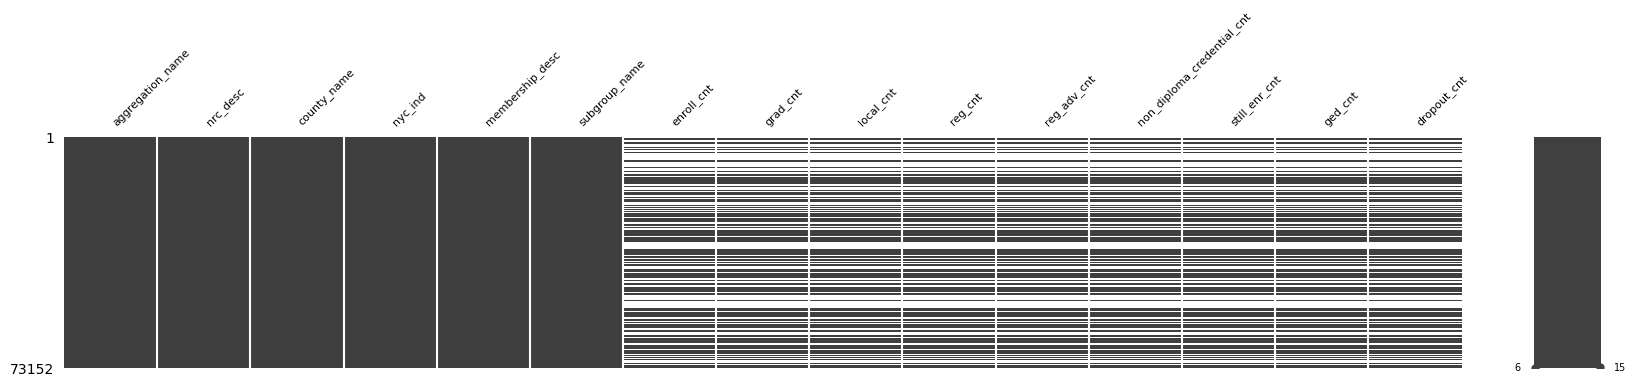

In [19]:
msno.matrix(school_df, figsize = (20,3), fontsize = 8)

The plot shows that the values are missing as whole rows. So let's check the percentage of missing values for enroll count column across subgroups.

In [20]:
def null_percentage(series):
    return (series.isnull().sum() / len(series)) * 100

school_df.groupby('subgroup_name')['enroll_cnt'].apply(null_percentage)

subgroup_name
All Students                          0.687285
American Indian/Alaska Native        79.420732
Asian/Pacific Islander               59.229651
Black                                53.816047
Economically Disadvantaged            3.163618
English Language Learner             52.192982
Female                                2.216749
Formerly English Language Learner    60.928962
General Education Students           10.453649
Hispanic                             43.973747
Homeless                             64.396743
In Foster Care                       94.155844
Male                                  2.409046
Migrant                              95.027624
Multiracial                          73.680297
Not Economically Disadvantaged        2.730884
Not English Language Learner         78.564405
Not Homeless                         76.386843
Not Migrant                          99.558174
Not in Foster Care                   99.115479
Parent Not in Armed Forces           99.312715

More than 90% values are missing for the following subgroup combos 
- Migrant, Not Migrant
- In Foster Care, Not in Foster Care 
- Parent in Armed Forces, Parent Not in Armed Forces

Lets drop these rows as it does not add any volume of data

In [21]:
# Specify the categories you want to remove
categories_to_remove = ['Migrant', 'Not Migrant', 'In Foster Care', 'Not in Foster Care', 'Parent in Armed Forces', 'Parent Not in Armed Forces']

# Use boolean indexing to filter out the specified categories
school_df = school_df[~school_df['subgroup_name'].isin(categories_to_remove)]

school_df.subgroup_name.unique()

array(['All Students', 'Female', 'Male', 'American Indian/Alaska Native',
       'Black', 'Hispanic', 'Asian/Pacific Islander', 'White',
       'Multiracial', 'General Education Students',
       'Students with Disabilities', 'Not English Language Learner',
       'English Language Learner', 'Formerly English Language Learner',
       'Economically Disadvantaged', 'Not Economically Disadvantaged',
       'Homeless', 'Not Homeless'], dtype=object)

In [22]:
school_df.groupby('subgroup_name')['enroll_cnt'].apply(null_percentage)

subgroup_name
All Students                          0.687285
American Indian/Alaska Native        79.420732
Asian/Pacific Islander               59.229651
Black                                53.816047
Economically Disadvantaged            3.163618
English Language Learner             52.192982
Female                                2.216749
Formerly English Language Learner    60.928962
General Education Students           10.453649
Hispanic                             43.973747
Homeless                             64.396743
Male                                  2.409046
Multiracial                          73.680297
Not Economically Disadvantaged        2.730884
Not English Language Learner         78.564405
Not Homeless                         76.386843
Students with Disabilities            9.831182
White                                31.111111
Name: enroll_cnt, dtype: float64

The rows with missing values are missing as a whole. So lets drop such rows as it does not add any numeric value to the data.

Subgroups are missing in random across schools and cohorts. So lets create a base table with a combination of all schools, cohort and subgroups.

In [23]:
# Get unique values of subgroups
subgroups= school_df['subgroup_name'].to_frame().drop_duplicates().reset_index(drop=True)
subgroups

,subgroup_name
0,All Students
1,Female
2,Male
3,American Indian/Alaska Native
4,Black
5,Hispanic
6,Asian/Pacific Islander
7,White
8,Multiracial
9,General Education Students


In [24]:
# Get unique values of schools and cohorts
categories = school_df[['aggregation_name', 'nrc_desc', 'county_name', 'nyc_ind', 'membership_desc']].drop_duplicates().reset_index(drop=True)
categories.head()

,aggregation_name,nrc_desc,county_name,nyc_ind,membership_desc
0,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome
1,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2014 Total Cohort - 5 Year Outcome
2,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2015 Total Cohort - 4 Year Outcome
3,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2014 Total Cohort - 5 Year Outcome - August 2019
4,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2015 Total Cohort - 4 Year Outcome - August 2019


In [25]:
# Performing the cross join
subgroups['key'] = 1
categories['key'] = 1

base_df = pd.merge(categories, subgroups, on='key').drop('key', axis=1)
base_df.head()

,aggregation_name,nrc_desc,county_name,nyc_ind,membership_desc,subgroup_name
0,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,All Students
1,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Female
2,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Male
3,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,American Indian/Alaska Native
4,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Black


In [26]:
# Left join the base dataframe with the actual dataframe to populate all the values
merge_on = ['aggregation_name', 'nrc_desc', 'county_name', 'nyc_ind', 'membership_desc', 'subgroup_name']


final_df = pd.merge(base_df, school_df,on = merge_on, how = 'left')
final_df.head()

,aggregation_name,nrc_desc,county_name,nyc_ind,membership_desc,subgroup_name,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
0,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,All Students,658.0,464.0,63.0,310.0,91.0,16.0,30.0,0.0,148.0
1,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Female,324.0,246.0,30.0,169.0,47.0,2.0,11.0,0.0,65.0
2,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Male,334.0,218.0,33.0,141.0,44.0,14.0,19.0,0.0,83.0
3,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,American Indian/Alaska Native,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Black,367.0,248.0,42.0,183.0,23.0,10.0,18.0,0.0,91.0


In [27]:
# Sanity Check

len(final_df) == len(subgroups) * len(categories)

True

## Missing All Students Values

Get list of all school districts which do not have  all students values

In [28]:
missing_all_values = final_df[(final_df['subgroup_name'] == 'All Students') & final_df.isnull().any(axis=1)]['aggregation_name'].unique()
missing_all_values

array(['RANDOLPH ACADEMY UNION FREE SCHOOL DISTRICT',
       'BERKSHIRE UNION FREE SCHOOL DISTRICT',
       'LONG LAKE CENTRAL SCHOOL DISTRICT',
       'KIRYAS JOEL VILLAGE UNION FREE SCHOOL DISTRICT',
       'LITTLE FLOWER UNION FREE SCHOOL DISTRICT',
       'FISHERS ISLAND UNION FREE SCHOOL DISTRICT',
       'GREENBURGH-NORTH CASTLE UNION FREE SCHOOL DISTRICT',
       'MOUNT PLEASANT-BLYTHEDALE UNION FREE SCHOOL DISTRICT'],
      dtype=object)

Check the amount of missing values from these school districts

In [29]:
final_df[final_df['aggregation_name'].isin(missing_all_values)].groupby('aggregation_name')['enroll_cnt'].apply(null_percentage)

aggregation_name
BERKSHIRE UNION FREE SCHOOL DISTRICT                     98.148148
FISHERS ISLAND UNION FREE SCHOOL DISTRICT                96.296296
GREENBURGH-NORTH CASTLE UNION FREE SCHOOL DISTRICT       97.222222
KIRYAS JOEL VILLAGE UNION FREE SCHOOL DISTRICT           96.296296
LITTLE FLOWER UNION FREE SCHOOL DISTRICT                100.000000
LONG LAKE CENTRAL SCHOOL DISTRICT                        98.148148
MOUNT PLEASANT-BLYTHEDALE UNION FREE SCHOOL DISTRICT    100.000000
RANDOLPH ACADEMY UNION FREE SCHOOL DISTRICT             100.000000
Name: enroll_cnt, dtype: float64

These school districts has 98% nulls and do not add any values to the data. Let's drop them.

In [30]:
# Use boolean indexing to filter out the specified categories
final_df = final_df[~final_df['aggregation_name'].isin(missing_all_values)]

# Sanity Check
final_df[(final_df['subgroup_name'] == 'All Students') & final_df.isnull().any(axis=1)]

,aggregation_name,nrc_desc,county_name,nyc_ind,membership_desc,subgroup_name,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt


## NRC with all null values for subgroups

In [31]:
df = final_df.groupby(['nrc_desc', 'subgroup_name'])['enroll_cnt'].apply(null_percentage).to_frame().reset_index()
df = df[df['enroll_cnt'] > 99]
df

,nrc_desc,subgroup_name,enroll_cnt
79,Rural High Needs,Formerly English Language Learner,100.0


The above combination does not haver any data. So lets drop it

In [32]:
final_df = final_df[~((final_df['nrc_desc'] == 'Rural High Needs') & (final_df['subgroup_name'] == 'Formerly English Language Learner'))]

## Other subgroups

Now that we have the _All students_ value. Let's fill in the missing values in other subgroups.

We have observed multiple subgroup combinations in the data like
- __Gender:__ Male, Female
- __Race:__ American Indian/Alaska Native, Black, Hispanic, Asian/Pacific Islander, White, Multiracial
- __Disability:__ General Education Students, Students with Disabilities
- __Language:__ Not English Language Learner, English Language Learner, Formerly English Language Learner
- __Economy:__ Economically Disadvantaged, Not Economically Disadvantaged
- __Shelter:__ Homeless, Not Homeless

Our understanding is that the values across the combos should add up to the _All Students_ value. Let's understand our approach using an example, considering gender:

- Calculate the average ratio of male and female at the nrc_code level.
- Scale the ratio to 100% scale.
- Use the ratio to distribute the missing values.

Similarly, we repeat the process for all the above subgroup combos


In [33]:
# Create a temporary dataframe will non-null entries
temp_df = final_df.dropna()

# Create an empty dataframe to store the results
ratio_df = pd.DataFrame()

# Iterate through all subgroups except all students
for subgroup in subgroups['subgroup_name'][1:]:  

    # create a dataframe with values of specific subgroup   
    county_sg_df = temp_df[temp_df['subgroup_name']==subgroup]
    
    # create a dataframe with values of all students  
    county_all_df = temp_df[temp_df['subgroup_name']=='All Students']

    # left join both the dataframe
    merge_cols = ['aggregation_name', 'nrc_desc', 'county_name', 'nyc_ind',	'membership_desc']
    merge_df = pd.merge(county_sg_df, county_all_df, on = merge_cols, how = 'left')

    # Divide subgroup value by all student value to get ratio
    merge_df['enroll_ratio'] = merge_df['enroll_cnt_x'] / merge_df['enroll_cnt_y']
    merge_df['grad_ratio'] = merge_df['grad_cnt_x'] / merge_df['grad_cnt_y']
    merge_df['local_ratio'] = merge_df['local_cnt_x'] / merge_df['local_cnt_y']
    merge_df['reg_ratio'] = merge_df['reg_cnt_x'] / merge_df['reg_cnt_y']
    merge_df['reg_adv_ratio'] = merge_df['reg_adv_cnt_x'] / merge_df['reg_adv_cnt_y']
    merge_df['non_dip_ratio'] = merge_df['non_diploma_credential_cnt_x'] / merge_df['non_diploma_credential_cnt_y']
    merge_df['still_enr_ratio'] = merge_df['still_enr_cnt_x'] / merge_df['still_enr_cnt_y']
    merge_df['ged_ratio'] = merge_df['ged_cnt_x'] / merge_df['ged_cnt_y']
    merge_df['dropout_ratio'] = merge_df['dropout_cnt_x'] / merge_df['dropout_cnt_y']

    # Fetch only the ratio columns
    merge_df = merge_df[['aggregation_name', 'nrc_desc', 'county_name', 'nyc_ind','membership_desc', 'subgroup_name_x',
                            'enroll_ratio', 'grad_ratio', 'local_ratio', 'reg_ratio', 'reg_adv_ratio', 'non_dip_ratio', 'still_enr_ratio', 'ged_ratio', 'dropout_ratio']]   

    group_cols = ['nrc_desc']    
    avg_cols = ['enroll_ratio', 'grad_ratio', 'local_ratio', 'reg_ratio', 'reg_adv_ratio', 'non_dip_ratio', 'still_enr_ratio', 'ged_ratio', 'dropout_ratio']
    agg_df = merge_df.groupby(by=group_cols)[avg_cols].mean().reset_index()
                
    agg_df['subgroup_name'] = subgroup
    agg_df = agg_df.fillna(0)
        
    ratio_df = pd.concat([ratio_df, agg_df], ignore_index=True)

# Sort the dataframe based on subgroup
ratio_df = pd.merge(ratio_df, school_df_bup[['subgroup_code','subgroup_name']].drop_duplicates(), on = 'subgroup_name')
ratio_df = ratio_df.sort_values(by = ['nrc_desc','subgroup_code'])
ratio_df = ratio_df.drop(columns='subgroup_code', axis = 1).reset_index(drop = True)
              
display(ratio_df.head(10))           

,nrc_desc,enroll_ratio,grad_ratio,local_ratio,reg_ratio,reg_adv_ratio,non_dip_ratio,still_enr_ratio,ged_ratio,dropout_ratio,subgroup_name
0,Average Needs,0.485020,0.498269,0.424928,0.455983,0.554801,0.336604,0.347434,0.357999,0.383634,Female
1,Average Needs,0.514980,0.501731,0.575072,0.544017,0.445199,0.663396,0.652566,0.642001,0.616366,Male
2,Average Needs,0.051843,0.048869,0.073458,0.057112,0.035890,0.049020,0.060032,0.000000,0.110779,American Indian/Alaska Native
3,Average Needs,0.110928,0.105266,0.188040,0.128782,0.064027,0.165078,0.150466,0.138407,0.119610,Black
4,Average Needs,0.153235,0.143013,0.198729,0.169673,0.102648,0.143934,0.224415,0.201268,0.283410,Hispanic
5,Average Needs,0.051697,0.053832,0.020812,0.035894,0.072913,0.025380,0.043610,0.005023,0.019605,Asian/Pacific Islander
6,Average Needs,0.785914,0.795634,0.712846,0.765819,0.837237,0.753957,0.686597,0.722697,0.685525,White
7,Average Needs,0.032094,0.029590,0.035825,0.035780,0.023892,0.038088,0.040838,0.038111,0.062968,Multiracial
8,Average Needs,0.848178,0.883528,0.207793,0.871956,0.988774,0.027057,0.364562,0.682312,0.659489,General Education Students
9,Average Needs,0.151822,0.116472,0.792207,0.128044,0.011226,0.972943,0.635438,0.317688,0.340511,Students with Disabilities


In [34]:
# Create a group column

subgroup_combos = {'Gender': ['Male', 'Female'],
                   'Race': ['American Indian/Alaska Native', 'Black', 'Hispanic', 'Asian/Pacific Islander', 'White', 'Multiracial'],
                   'Disability': ['General Education Students', 'Students with Disabilities'],
                   'Language': ['Not English Language Learner', 'English Language Learner', 'Formerly English Language Learner'],
                   'Economy': ['Economically Disadvantaged', 'Not Economically Disadvantaged'],
                   'Shelter': ['Homeless', 'Not Homeless']}

ratio_df['group'] = ratio_df['subgroup_name'].map({value: category for category, values in subgroup_combos.items() for value in values})

ratio_df.head()

,nrc_desc,enroll_ratio,grad_ratio,local_ratio,reg_ratio,reg_adv_ratio,non_dip_ratio,still_enr_ratio,ged_ratio,dropout_ratio,subgroup_name,group
0,Average Needs,0.485020,0.498269,0.424928,0.455983,0.554801,0.336604,0.347434,0.357999,0.383634,Female,Gender
1,Average Needs,0.514980,0.501731,0.575072,0.544017,0.445199,0.663396,0.652566,0.642001,0.616366,Male,Gender
2,Average Needs,0.051843,0.048869,0.073458,0.057112,0.035890,0.049020,0.060032,0.000000,0.110779,American Indian/Alaska Native,Race
3,Average Needs,0.110928,0.105266,0.188040,0.128782,0.064027,0.165078,0.150466,0.138407,0.119610,Black,Race
4,Average Needs,0.153235,0.143013,0.198729,0.169673,0.102648,0.143934,0.224415,0.201268,0.283410,Hispanic,Race


In [35]:
# Checking the sum of ratios
ratio_df.groupby(by= ['nrc_desc', 'group']).sum().reset_index().head(6)

,nrc_desc,group,enroll_ratio,grad_ratio,local_ratio,reg_ratio,reg_adv_ratio,non_dip_ratio,still_enr_ratio,ged_ratio,dropout_ratio
0,Average Needs,Disability,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Average Needs,Economy,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Average Needs,Gender,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Average Needs,Language,1.027189,1.028067,1.029903,1.045439,1.009085,1.000000,1.017286,1.004773,1.030209
4,Average Needs,Race,1.185710,1.176203,1.229710,1.193059,1.136608,1.175456,1.205958,1.105507,1.281897
5,Average Needs,Shelter,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Sum of ratio of Language and Race columns are exceeding 1. Lets scale it down to 1 scale.

In [36]:
# Scaling down the ratios to 1 scale
scale_ratio_df = pd.merge(ratio_df, ratio_df.groupby(by= ['nrc_desc', 'group']).sum().reset_index(), on = ['nrc_desc', 'group'])

ratio_cols = ['enroll_ratio', 'grad_ratio', 'local_ratio', 'reg_ratio', 'reg_adv_ratio', 'non_dip_ratio', 'still_enr_ratio', 'ged_ratio', 'dropout_ratio']

for col in ratio_cols:
    col_x = f"{col}_x"
    col_y = f"{col}_y"
    
    scale_ratio_df[col] = scale_ratio_df[col_x] / scale_ratio_df[col_y]

scale_ratio_df = scale_ratio_df[['nrc_desc', 'subgroup_name', 'group'] + ratio_cols]

#Sanity Check
scale_ratio_df.groupby(by= ['nrc_desc', 'group']).sum().reset_index().head(6)

,nrc_desc,group,enroll_ratio,grad_ratio,local_ratio,reg_ratio,reg_adv_ratio,non_dip_ratio,still_enr_ratio,ged_ratio,dropout_ratio
0,Average Needs,Disability,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,Average Needs,Economy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Average Needs,Gender,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Average Needs,Language,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Average Needs,Race,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,Average Needs,Shelter,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [37]:
# merge final_df with ratio and all students values
result_df = pd.merge(final_df, scale_ratio_df, on = ['nrc_desc', 'subgroup_name'], how = 'left')

merge_cols = ['aggregation_name', 'nrc_desc', 'county_name', 'nyc_ind',	'membership_desc']
result_df = pd.merge(result_df, final_df[final_df['subgroup_name'] == 'All Students'], on = merge_cols, how = 'left')

# Create a coalesce function to fill in null values
def coalesce(val, allval, ratio):
    '''Performs null treatment'''
    result_df[val] = np.where(result_df[val].isnull(), result_df[ratio] * result_df[allval], result_df[val]).astype(int)

# Pass all the count columns into coalesce function for null treatment
coalesce('enroll_cnt_x', 'enroll_cnt_y', 'enroll_ratio')
coalesce('grad_cnt_x', 'grad_cnt_y', 'grad_ratio')
coalesce('local_cnt_x', 'local_cnt_y', 'local_ratio')
coalesce('reg_cnt_x', 'reg_cnt_y', 'reg_ratio')
coalesce('reg_adv_cnt_x', 'reg_adv_cnt_y', 'reg_adv_ratio')
coalesce('non_diploma_credential_cnt_x', 'non_diploma_credential_cnt_y', 'non_dip_ratio')
coalesce('still_enr_cnt_x', 'still_enr_cnt_y', 'still_enr_ratio')
coalesce('ged_cnt_x', 'ged_cnt_y', 'ged_ratio')
coalesce('dropout_cnt_x', 'dropout_cnt_y', 'dropout_ratio')

# Fetch final columns
result_df = result_df[['aggregation_name', 'nrc_desc', 'county_name', 'nyc_ind', 'membership_desc', 'subgroup_name_x', 
                      'enroll_cnt_x', 'grad_cnt_x', 'local_cnt_x', 'reg_cnt_x',  'reg_adv_cnt_x', 'non_diploma_credential_cnt_x', 'still_enr_cnt_x', 'ged_cnt_x', 'dropout_cnt_x']]

result_df.columns = [col[:-2] if col.endswith('_x') else col for col in result_df.columns]

result_df.head()

,aggregation_name,nrc_desc,county_name,nyc_ind,membership_desc,subgroup_name,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
0,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,All Students,658,464,63,310,91,16,30,0,148
1,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Female,324,246,30,169,47,2,11,0,65
2,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Male,334,218,33,141,44,14,19,0,83
3,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,American Indian/Alaska Native,17,8,0,6,1,0,1,0,7
4,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Black,367,248,42,183,23,10,18,0,91


In [38]:
# Sanity Check
'Nulls Found' if result_df.isnull().sum().sum() != 0 else 'No Nulls'

'No Nulls'

## Handling Outliers

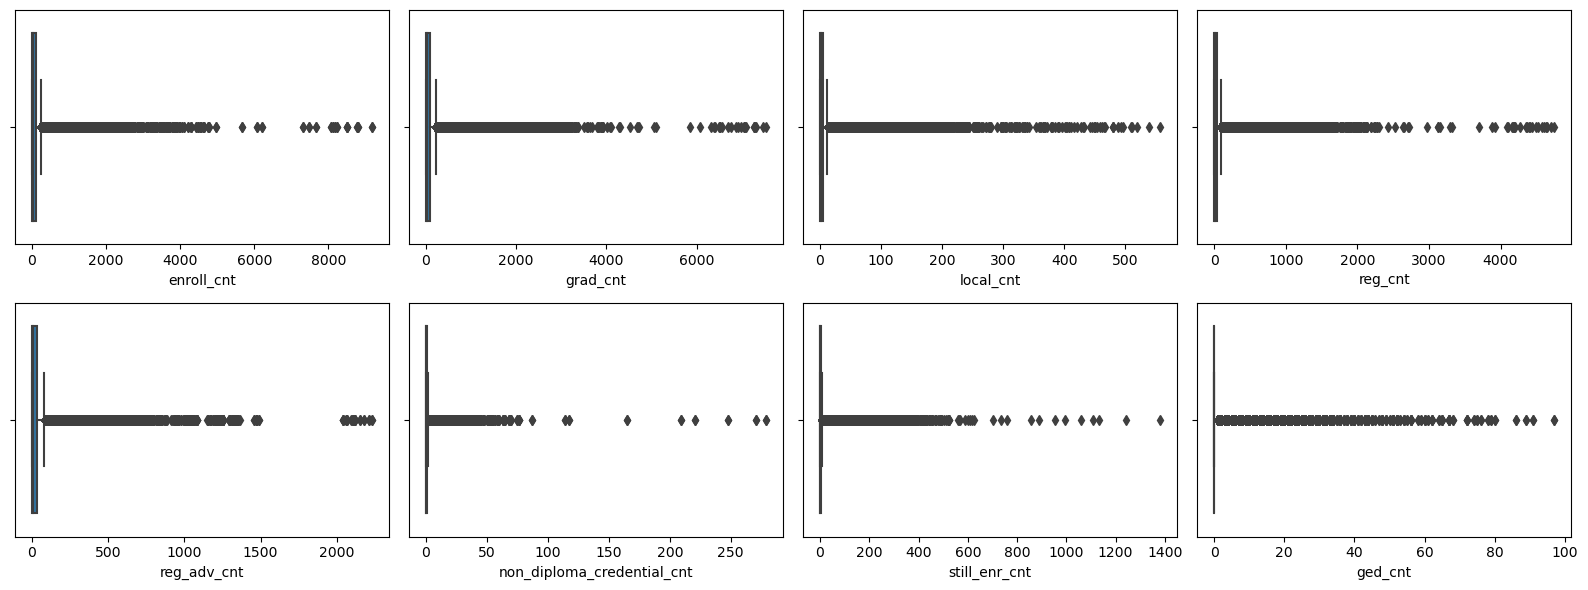

In [39]:
plt.figure(figsize = (16,6))
pos = 1

for col in ['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt',  'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt']:

    plt.subplot (2,4,pos)
    sns.boxplot(data= result_df, x = col)
    pos +=1
    
plt.tight_layout()
plt.show()

All values are right-skewed. Lets use box cox transformation to transform it into normal distribution and reduce outliers.

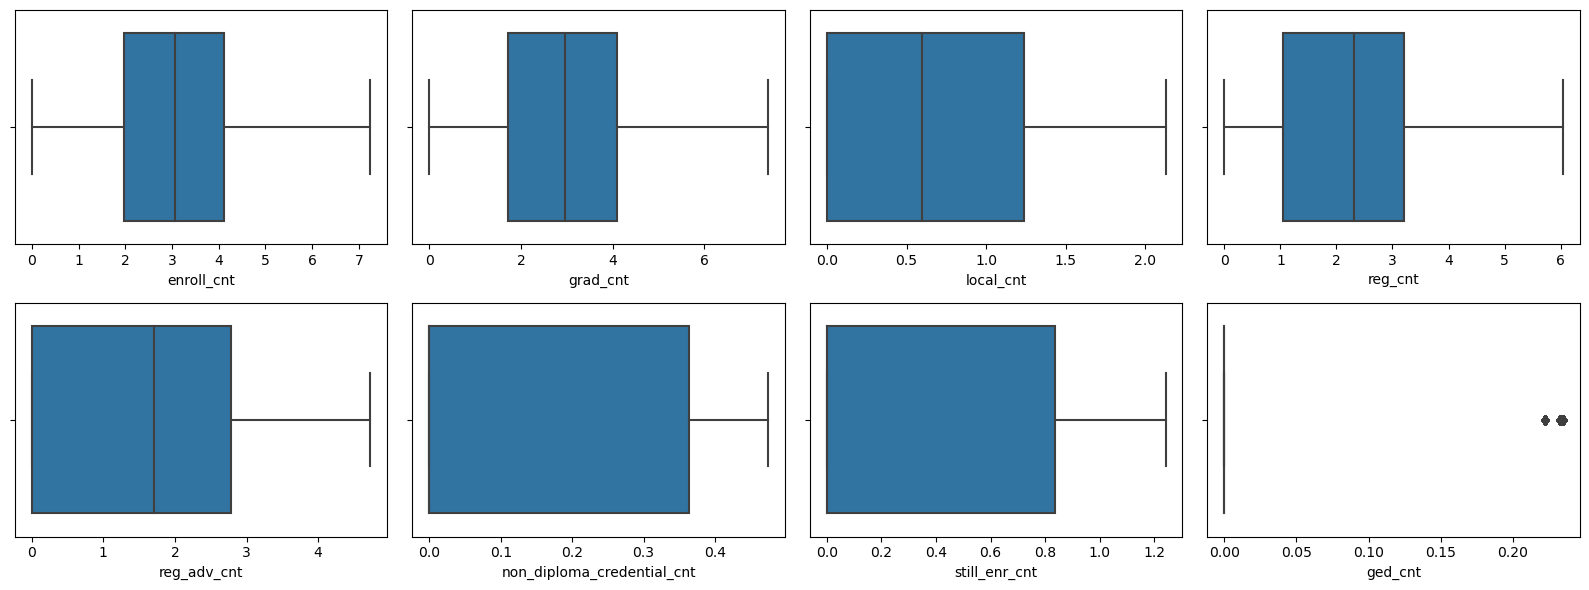

In [40]:
# Apply Box-Cox transformation to the columns for normalization, adding 1 to ensure positive values

plt.figure(figsize = (16,6))
pos = 1

for col in ['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt',  'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt']:
    
    result_df[col], lambda_val = boxcox(result_df[col] + 1)
    
    plt.subplot (2,4,pos)
    sns.boxplot(data= result_df, x = col)
    pos +=1

plt.tight_layout()
plt.show()

# Prepped Data EDA

## Univariate Analysis


 ******************** Before Data Prep ********************

 -------------------- aggregation_name --------------------
Summary Statistics


count                           59714
unique                            680
top       ALBANY CITY SCHOOL DISTRICT
freq                              108
Name: aggregation_name, dtype: object

Note: The graph displays only the top 20 frequent values


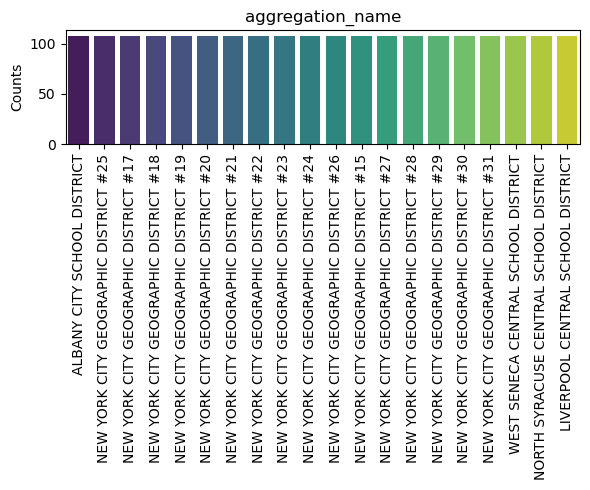

Insights:
The aggregation_name column is comprised of 680 distinct categorical values, with the most frequently occurring value being 'ALBANY CITY SCHOOL DISTRICT'

 ******************** After Data Prep ********************

 -------------------- aggregation_name --------------------
Summary Statistics


count                           71664
unique                            672
top       ALBANY CITY SCHOOL DISTRICT
freq                              108
Name: aggregation_name, dtype: object

Note: The graph displays only the top 20 frequent values


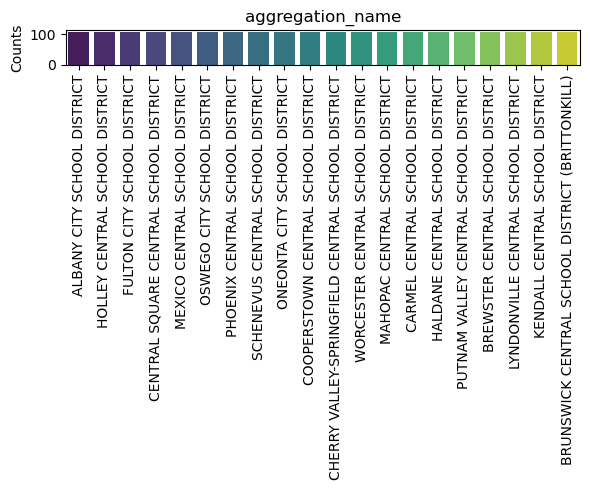

Insights:
The aggregation_name column is comprised of 672 distinct categorical values, with the most frequently occurring value being 'AKRON CENTRAL SCHOOL DISTRICT'

 ******************** Before Data Prep ********************

 -------------------- nrc_desc --------------------
Summary Statistics


count             59714
unique                6
top       Average Needs
freq              28758
Name: nrc_desc, dtype: object

Unique Values


array(['Urban-Suburban High Needs', 'Average Needs', 'Low Needs',
       'Rural High Needs', 'Buffalo  Rochester  Yonkers  Syracuse', 'NYC'],
      dtype=object)

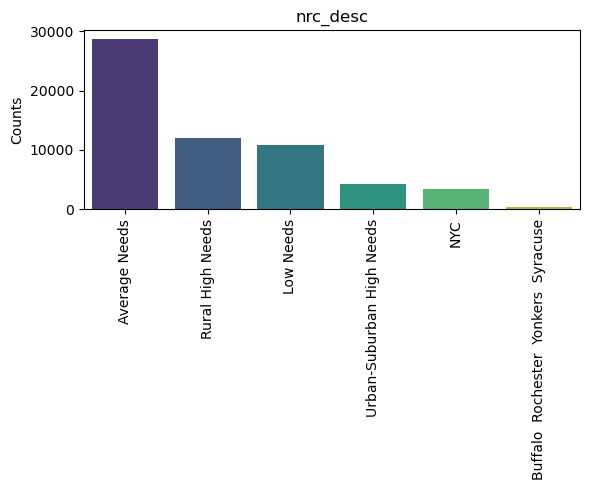

Insights:
The nrc_desc column is comprised of 6 distinct categorical values, with the most frequently occurring value being 'Average Needs'

 ******************** After Data Prep ********************

 -------------------- nrc_desc --------------------
Summary Statistics


count             71664
unique                6
top       Average Needs
freq              35316
Name: nrc_desc, dtype: object

Unique Values


array(['Urban-Suburban High Needs', 'Average Needs', 'Low Needs',
       'Rural High Needs', 'Buffalo  Rochester  Yonkers  Syracuse', 'NYC'],
      dtype=object)

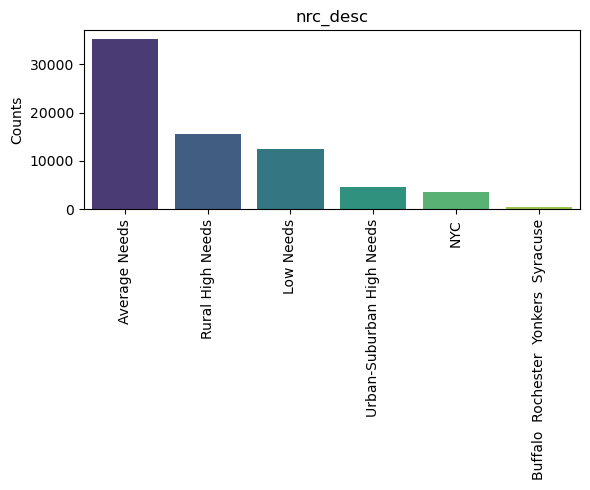

Insights:
The nrc_desc column is comprised of 6 distinct categorical values, with the most frequently occurring value being 'Average Needs'

 ******************** Before Data Prep ********************

 -------------------- county_name --------------------
Summary Statistics


count       59714
unique         62
top       SUFFOLK
freq         5398
Name: county_name, dtype: object

Note: The graph displays only the top 20 frequent values


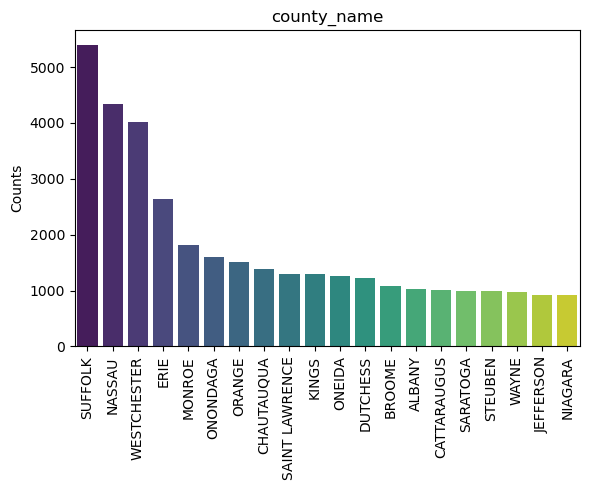

Insights:
The county_name column is comprised of 62 distinct categorical values, with the most frequently occurring value being 'SUFFOLK'

 ******************** After Data Prep ********************

 -------------------- county_name --------------------
Summary Statistics


count       71664
unique         62
top       SUFFOLK
freq         5832
Name: county_name, dtype: object

Note: The graph displays only the top 20 frequent values


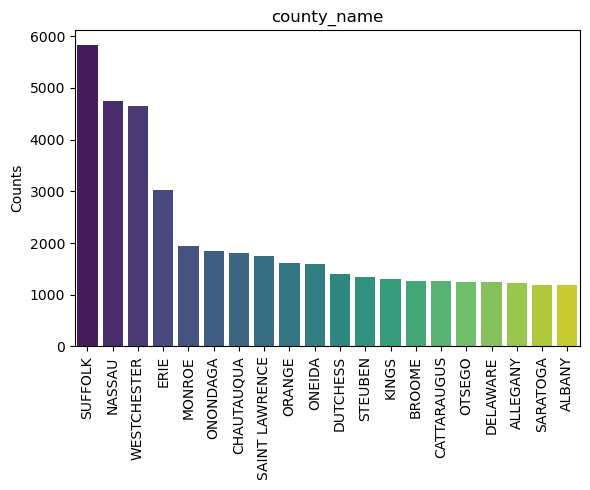

Insights:
The county_name column is comprised of 62 distinct categorical values, with the most frequently occurring value being 'SUFFOLK'

 ******************** Before Data Prep ********************

 -------------------- nyc_ind --------------------
Summary Statistics


count     59714
unique        2
top           0
freq      56262
Name: nyc_ind, dtype: int64

Unique Values


array([0, 1], dtype=object)

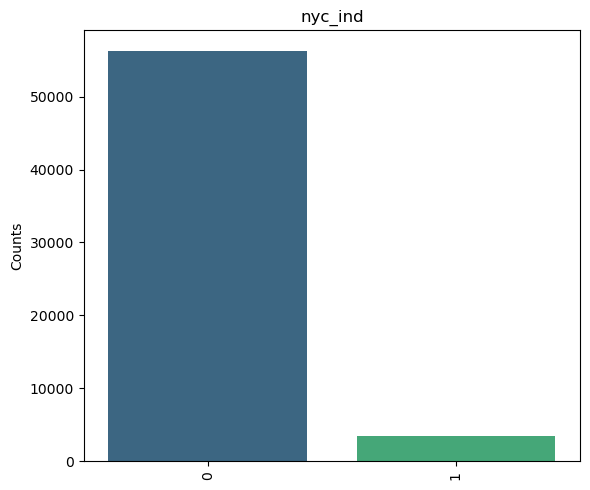

Insights:
The nyc_ind column is comprised of 2 distinct categorical values, with the most frequently occurring value being '0'

 ******************** After Data Prep ********************

 -------------------- nyc_ind --------------------
Summary Statistics


count     71664
unique        2
top           0
freq      68208
Name: nyc_ind, dtype: int64

Unique Values


array([0, 1], dtype=object)

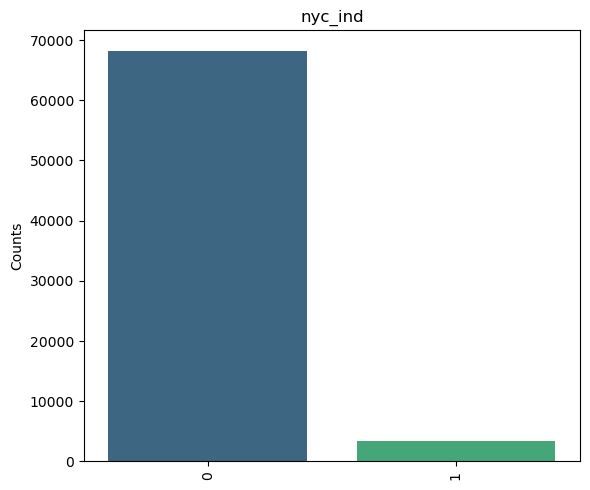

Insights:
The nyc_ind column is comprised of 2 distinct categorical values, with the most frequently occurring value being '0'

 ******************** Before Data Prep ********************

 -------------------- membership_desc --------------------
Summary Statistics


count                                  59714
unique                                     6
top       2015 Total Cohort - 4 Year Outcome
freq                                   10026
Name: membership_desc, dtype: object

Unique Values


array(['2013 Total Cohort - 6 Year Outcome',
       '2014 Total Cohort - 5 Year Outcome',
       '2015 Total Cohort - 4 Year Outcome',
       '2014 Total Cohort - 5 Year Outcome - August 2019',
       '2015 Total Cohort - 4 Year Outcome - August 2019',
       '2013 Total Cohort - 6 Year Outcome - August 2019'], dtype=object)

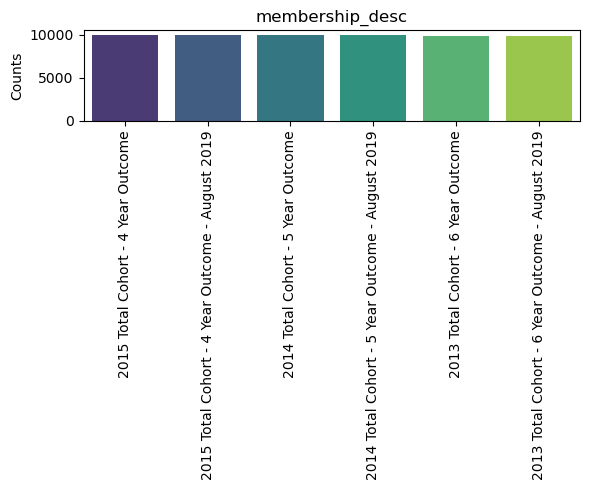

Insights:
The membership_desc column is comprised of 6 distinct categorical values, with the most frequently occurring value being '2015 Total Cohort - 4 Year Outcome'

 ******************** After Data Prep ********************

 -------------------- membership_desc --------------------
Summary Statistics


count                                  71664
unique                                     6
top       2013 Total Cohort - 6 Year Outcome
freq                                   11944
Name: membership_desc, dtype: object

Unique Values


array(['2013 Total Cohort - 6 Year Outcome',
       '2014 Total Cohort - 5 Year Outcome',
       '2015 Total Cohort - 4 Year Outcome',
       '2014 Total Cohort - 5 Year Outcome - August 2019',
       '2015 Total Cohort - 4 Year Outcome - August 2019',
       '2013 Total Cohort - 6 Year Outcome - August 2019'], dtype=object)

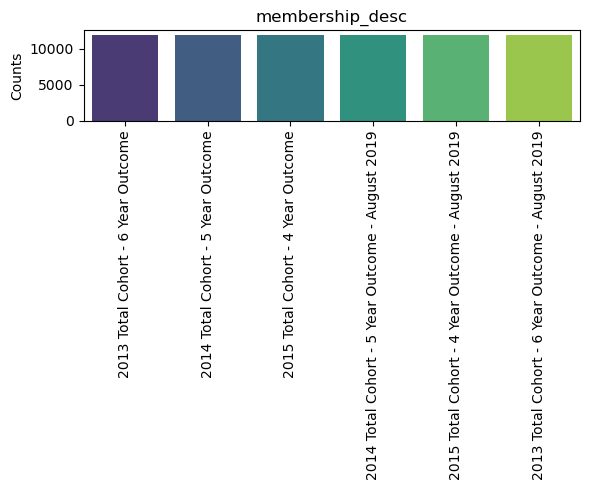

Insights:
The membership_desc column is comprised of 6 distinct categorical values, with the most frequently occurring value being '2013 Total Cohort - 6 Year Outcome'

 ******************** Before Data Prep ********************

 -------------------- subgroup_name --------------------
Summary Statistics


count            59714
unique              18
top       All Students
freq              4074
Name: subgroup_name, dtype: object

Note: The graph displays only the top 20 frequent values


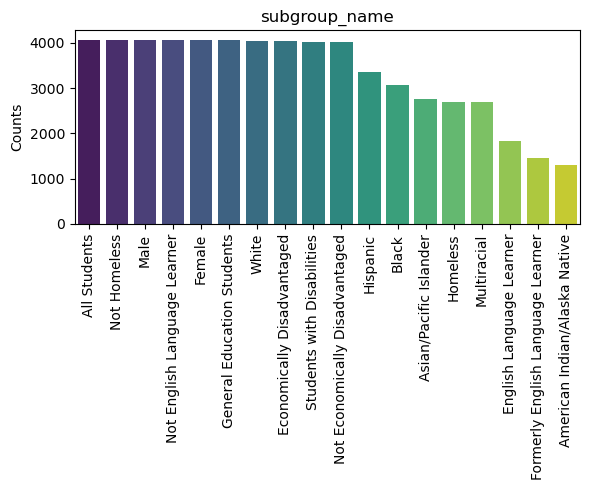

Insights:
The subgroup_name column is comprised of 18 distinct categorical values, with the most frequently occurring value being 'All Students'

 ******************** After Data Prep ********************

 -------------------- subgroup_name --------------------
Summary Statistics


count            71664
unique              18
top       All Students
freq              4032
Name: subgroup_name, dtype: object

Note: The graph displays only the top 20 frequent values


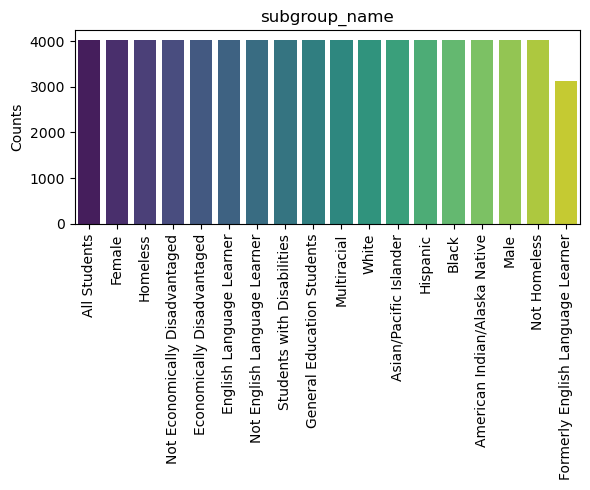

Insights:
The subgroup_name column is comprised of 18 distinct categorical values, with the most frequently occurring value being 'All Students'

 ******************** Before Data Prep ********************

 -------------------- enroll_cnt --------------------
Summary Statistics


count    39510.000000
mean       191.812706
std        439.816951
min          5.000000
25%         25.000000
50%         66.000000
75%        179.000000
max       9176.000000
Name: enroll_cnt, dtype: float64

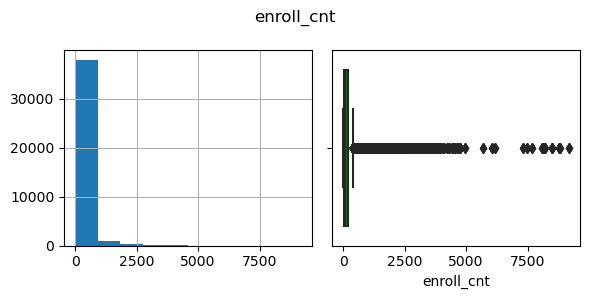

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 5.0 and 9176.0.
Outliers Detected!
Outliers%: 9.96

 ******************** After Data Prep ********************

 -------------------- enroll_cnt --------------------
Summary Statistics


count    71664.000000
mean         3.034541
std          1.412297
min          0.000000
25%          1.969913
50%          3.056912
75%          4.113754
max          7.249248
Name: enroll_cnt, dtype: float64

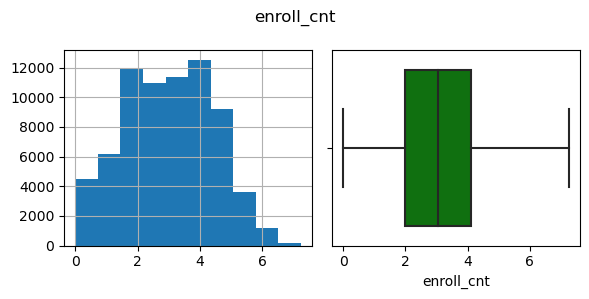

Insights:
Summary statistics, histogram, and boxplot indicate median exceeds mean. Plot shows left skewness.
The values range between 0.0 and 7.249248071072227.

 ******************** Before Data Prep ********************

 -------------------- grad_cnt --------------------
Summary Statistics


count    39510.000000
mean       161.011541
std        361.413913
min          0.000000
25%         20.000000
50%         57.000000
75%        156.000000
max       7540.000000
Name: grad_cnt, dtype: float64

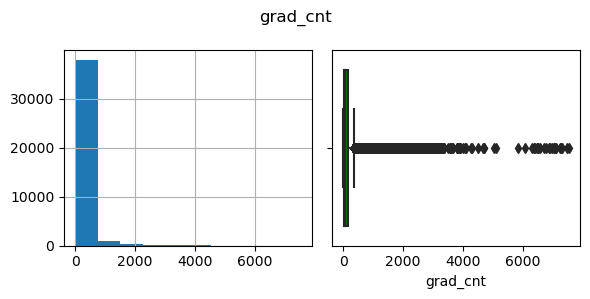

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 7540.0.
Outliers Detected!
Outliers%: 9.77

 ******************** After Data Prep ********************

 -------------------- grad_cnt --------------------
Summary Statistics


count    71664.000000
mean         2.914729
std          1.513616
min          0.000000
25%          1.723153
50%          2.966469
75%          4.083526
max          7.387295
Name: grad_cnt, dtype: float64

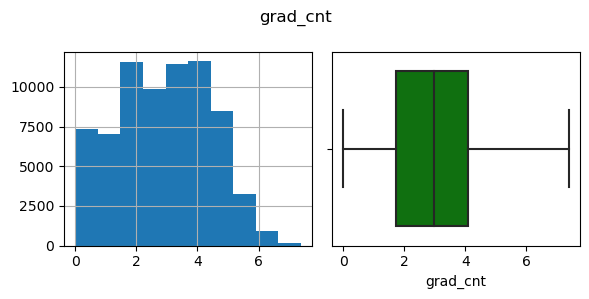

Insights:
Summary statistics, histogram, and boxplot indicate median exceeds mean. Plot shows left skewness.
The values range between 0.0 and 7.387294678830607.

 ******************** Before Data Prep ********************

 -------------------- local_cnt --------------------
Summary Statistics


count    39510.000000
mean        12.295444
std         31.842918
min          0.000000
25%          1.000000
50%          4.000000
75%         10.000000
max        557.000000
Name: local_cnt, dtype: float64

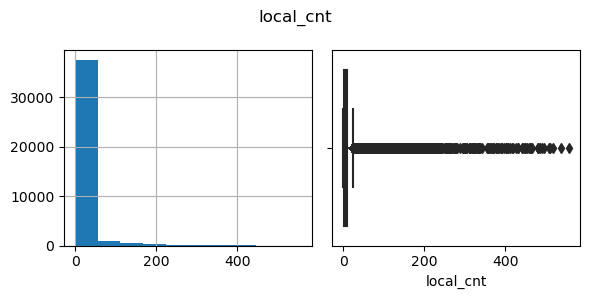

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 557.0.
Outliers Detected!
Outliers%: 10.38

 ******************** After Data Prep ********************

 -------------------- local_cnt --------------------
Summary Statistics


count    71664.000000
mean         0.702123
std          0.650132
min          0.000000
25%          0.000000
50%          0.597123
75%          1.238118
max          2.126121
Name: local_cnt, dtype: float64

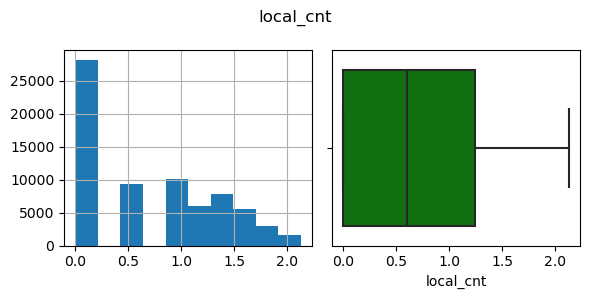

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 2.1261207798136765.

 ******************** Before Data Prep ********************

 -------------------- reg_cnt --------------------
Summary Statistics


count    39510.000000
mean        86.664920
std        225.820581
min          0.000000
25%         10.000000
50%         27.000000
75%         68.000000
max       4752.000000
Name: reg_cnt, dtype: float64

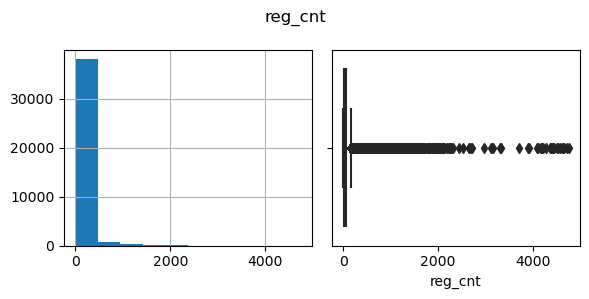

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 4752.0.
Outliers Detected!
Outliers%: 10.93

 ******************** After Data Prep ********************

 -------------------- reg_cnt --------------------
Summary Statistics


count    71664.000000
mean         2.208208
std          1.310331
min          0.000000
25%          1.049075
50%          2.305595
75%          3.204096
max          6.044081
Name: reg_cnt, dtype: float64

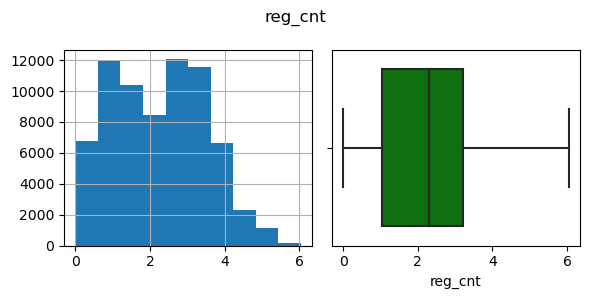

Insights:
Summary statistics, histogram, and boxplot indicate median exceeds mean. Plot shows left skewness.
The values range between 0.0 and 6.044081272857187.

 ******************** Before Data Prep ********************

 -------------------- reg_adv_cnt --------------------
Summary Statistics


count    39510.000000
mean        62.051177
std        132.955416
min          0.000000
25%          4.000000
50%         18.000000
75%         62.000000
max       2231.000000
Name: reg_adv_cnt, dtype: float64

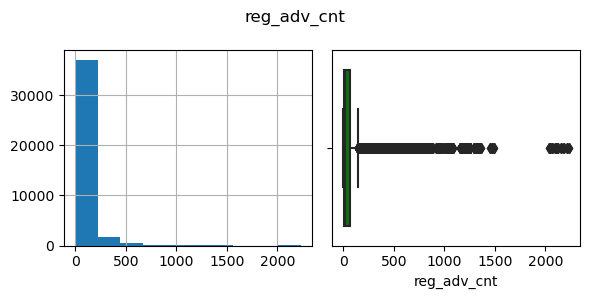

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 2231.0.
Outliers Detected!
Outliers%: 10.92

 ******************** After Data Prep ********************

 -------------------- reg_adv_cnt --------------------
Summary Statistics


count    71664.000000
mean         1.676660
std          1.310039
min          0.000000
25%          0.000000
50%          1.705016
75%          2.787773
max          4.731580
Name: reg_adv_cnt, dtype: float64

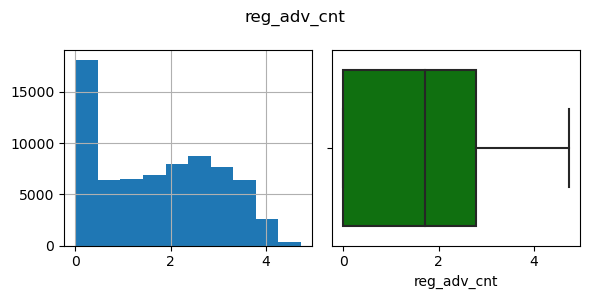

Insights:
Summary statistics, histogram, and boxplot indicate median exceeds mean. Plot shows left skewness.
The values range between 0.0 and 4.731579889112001.

 ******************** Before Data Prep ********************

 -------------------- non_diploma_credential_cnt --------------------
Summary Statistics


count    39510.000000
mean         1.920678
std          6.498988
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        279.000000
Name: non_diploma_credential_cnt, dtype: float64

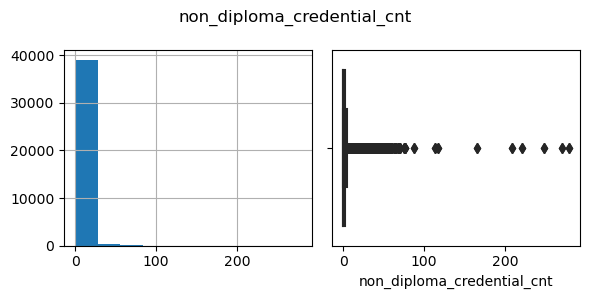

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 279.0.
Outliers Detected!
Outliers%: 7.6

 ******************** After Data Prep ********************

 -------------------- non_diploma_credential_cnt --------------------
Summary Statistics


count    71664.000000
mean         0.121286
std          0.189429
min          0.000000
25%          0.000000
50%          0.000000
75%          0.364285
max          0.474250
Name: non_diploma_credential_cnt, dtype: float64

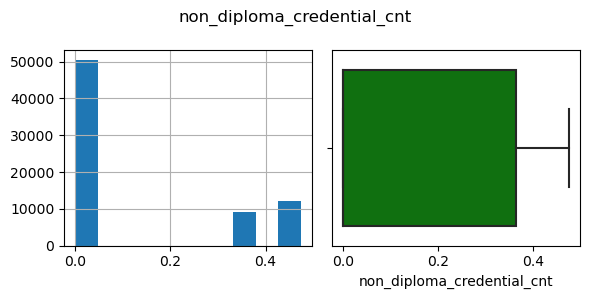

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 0.4742496831811057.

 ******************** Before Data Prep ********************

 -------------------- still_enr_cnt --------------------
Summary Statistics


count    39510.000000
mean        11.265553
std         40.705385
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max       1381.000000
Name: still_enr_cnt, dtype: float64

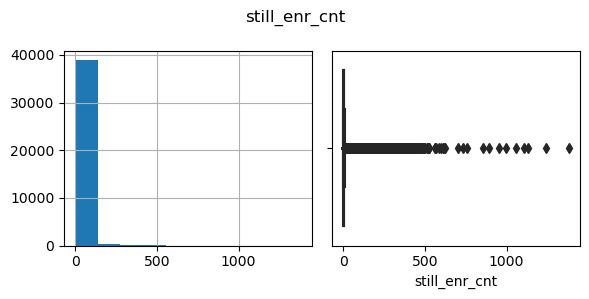

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 1381.0.
Outliers Detected!
Outliers%: 14.38

 ******************** After Data Prep ********************

 -------------------- still_enr_cnt --------------------
Summary Statistics


count    71664.000000
mean         0.381845
std          0.443783
min          0.000000
25%          0.000000
50%          0.000000
75%          0.835871
max          1.240439
Name: still_enr_cnt, dtype: float64

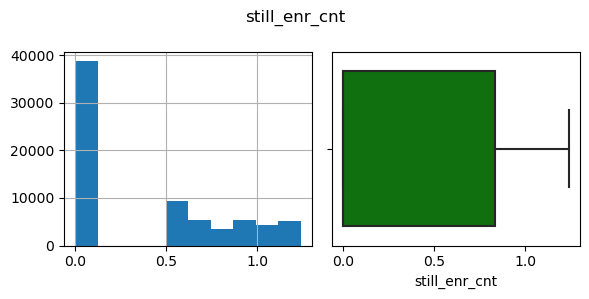

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 1.2404389293461633.

 ******************** Before Data Prep ********************

 -------------------- ged_cnt --------------------
Summary Statistics


count    39510.00000
mean         1.37874
std          4.95612
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max         97.00000
Name: ged_cnt, dtype: float64

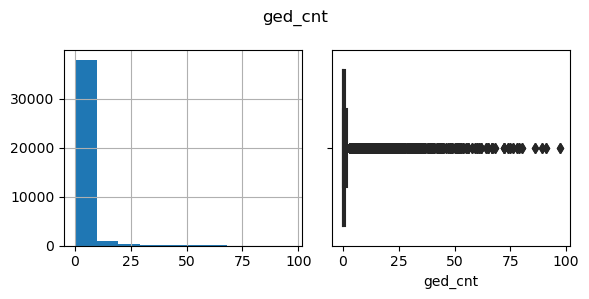

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 97.0.
Outliers Detected!
Outliers%: 11.79

 ******************** After Data Prep ********************

 -------------------- ged_cnt --------------------
Summary Statistics


count    71664.000000
mean         0.036342
std          0.083860
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.234852
Name: ged_cnt, dtype: float64

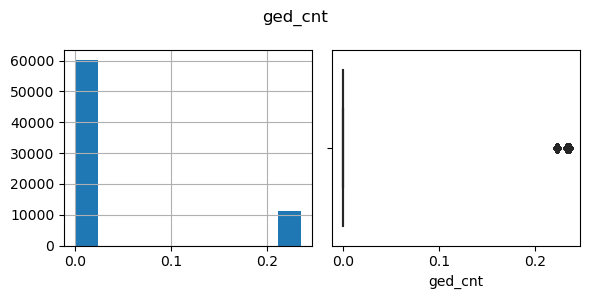

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 0.23485181471777353.
Outliers Detected!
Outliers%: 15.82

 ******************** Before Data Prep ********************

 -------------------- dropout_cnt --------------------
Summary Statistics


count    39510.000000
mean        16.135358
std         49.743188
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max       1091.000000
Name: dropout_cnt, dtype: float64

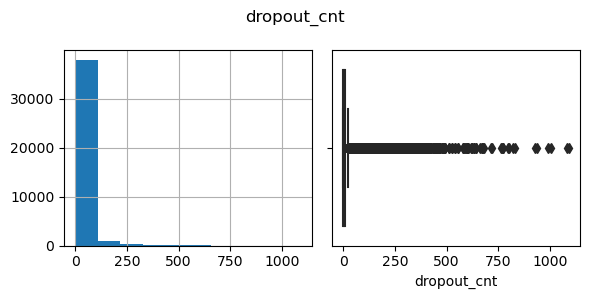

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 1091.0.
Outliers Detected!
Outliers%: 12.84

 ******************** After Data Prep ********************

 -------------------- dropout_cnt --------------------
Summary Statistics


count    71664.000000
mean         9.463468
std         37.757886
min          0.000000
25%          0.000000
50%          1.000000
75%          5.000000
max       1091.000000
Name: dropout_cnt, dtype: float64

In [41]:
for col in result_df.columns: 
    print('\n','*'*20,'Before Data Prep','*'*20)
    Univariate_EDA(school_df, col)
    print('\n','*'*20,'After Data Prep','*'*20)
    Univariate_EDA(result_df, col)

Both Nulls and Outliers are treated

## Bivariate Analysis

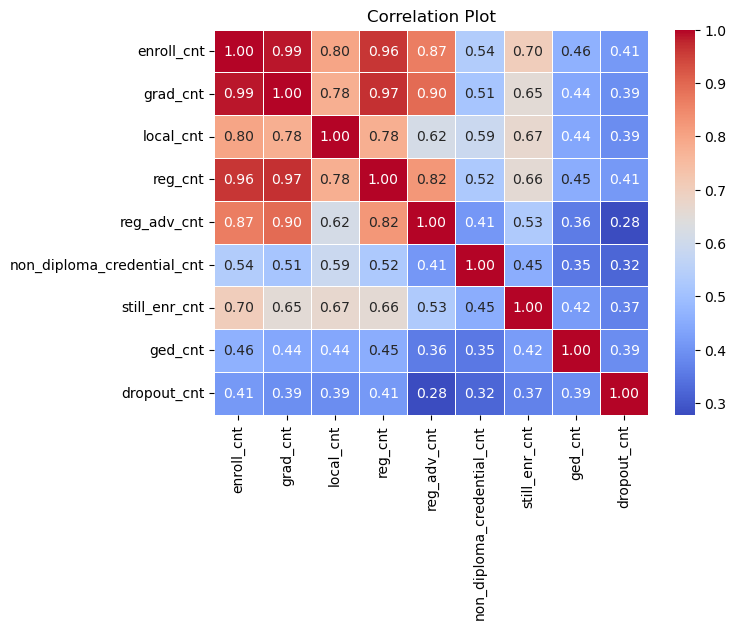

In [42]:
# Calculate the correlation matrix
correlation_matrix = result_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot')
plt.show()

__Insights:__

The enroll_cnt, grad_cnt, reg_cnt are highly correlated. The count columns are not correlated with the target columns, mostly because they are transfotmed using box-cox.

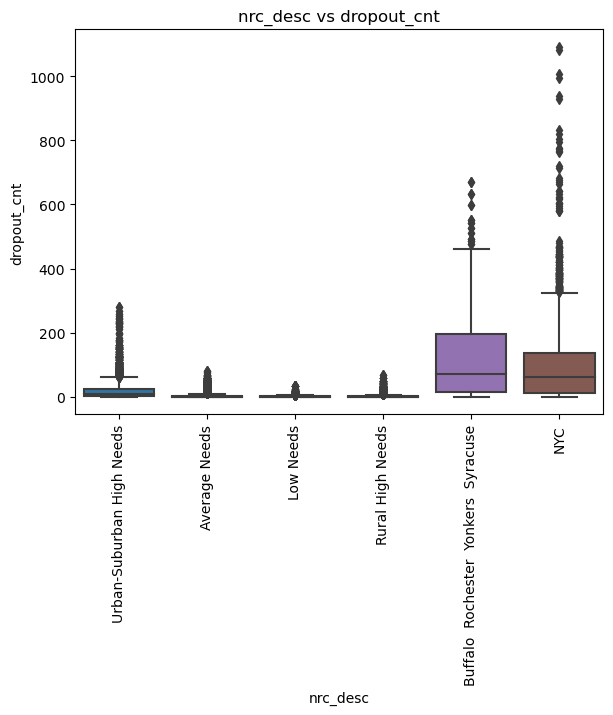

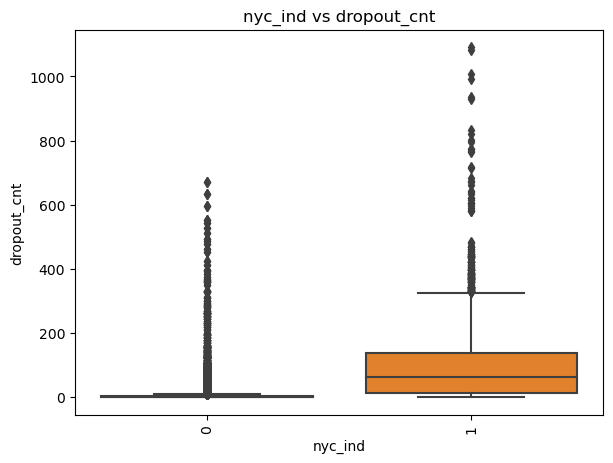

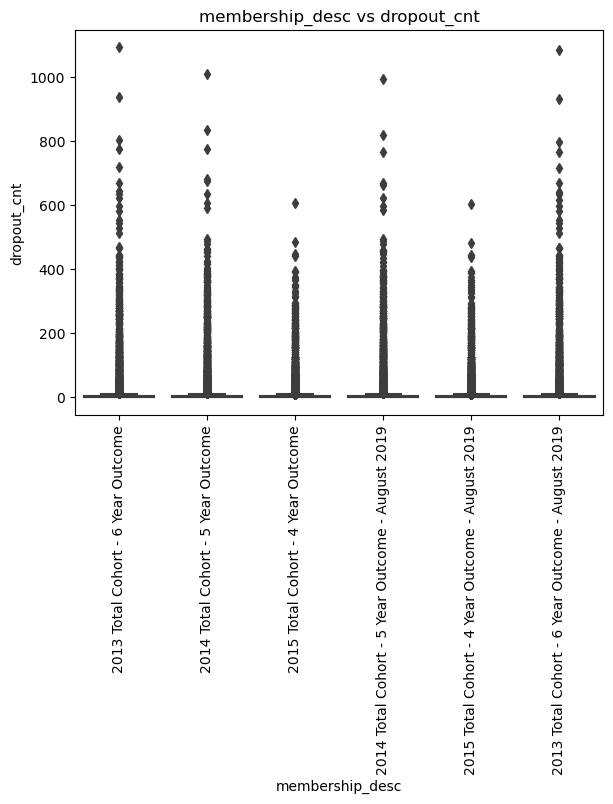

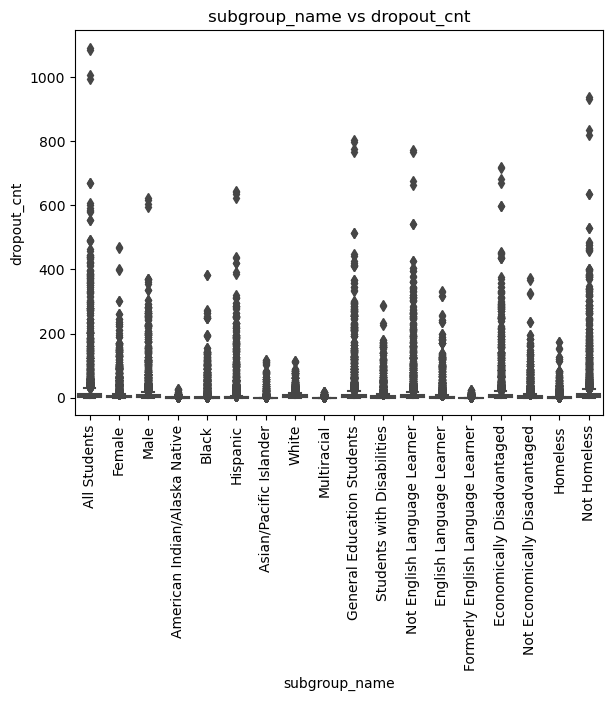

In [43]:
for cat in ['nrc_desc', 'nyc_ind', 'membership_desc', 'subgroup_name']:
    cat_vs_num (result_df, 'dropout_cnt', cat)

__Insights:__

The values are spread across categories. It is mostly right skewed and contains outliers.

# Feature Engineering

In [44]:
# List of columns to one-hot encode
encode_cols = ['aggregation_name', 'nrc_desc', 'county_name', 'membership_desc', 'subgroup_name']

# Apply one-hot encoding to the specified columns
encoded_df = pd.get_dummies(result_df[encode_cols], drop_first=True)

# Drop the original columns from the DataFrame
result_df.drop(columns=encode_cols, inplace=True)

# Concatenate the original DataFrame with the one-hot encoded columns
result_df = pd.concat([result_df, encoded_df], axis=1)

result_df.head()

,nyc_ind,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt,...,subgroup_name_General Education Students,subgroup_name_Hispanic,subgroup_name_Homeless,subgroup_name_Male,subgroup_name_Multiracial,subgroup_name_Not Economically Disadvantaged,subgroup_name_Not English Language Learner,subgroup_name_Not Homeless,subgroup_name_Students with Disabilities,subgroup_name_White
0,0,5.500082,5.384164,1.903843,4.546232,3.357293,0.473047,1.165422,0.0,148,...,0,0,0,0,0,0,0,0,0,0
1,0,4.987935,4.894172,1.767647,4.165021,2.994047,0.427484,1.075319,0.0,65,...,0,0,0,0,0,0,0,0,0,0
2,0,5.010284,4.799436,1.787520,4.047611,2.956190,0.472682,1.132173,0.0,83,...,0,0,0,1,0,0,0,0,0,0
3,0,2.681679,2.094655,0.000000,1.794090,0.660812,0.000000,0.531435,0.0,7,...,0,0,0,0,0,0,0,0,0,0
4,0,5.079343,4.900504,1.834539,4.216085,2.569147,0.471232,1.127460,0.0,91,...,0,0,0,0,0,0,0,0,0,0


# Split the Data

In [45]:
# Explanatory Variable
X = result_df.copy().drop('dropout_cnt', axis=1)
X.head(2)

,nyc_ind,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,aggregation_name_ADIRONDACK CENTRAL SCHOOL DISTRICT,...,subgroup_name_General Education Students,subgroup_name_Hispanic,subgroup_name_Homeless,subgroup_name_Male,subgroup_name_Multiracial,subgroup_name_Not Economically Disadvantaged,subgroup_name_Not English Language Learner,subgroup_name_Not Homeless,subgroup_name_Students with Disabilities,subgroup_name_White
0,0,5.500082,5.384164,1.903843,4.546232,3.357293,0.473047,1.165422,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,4.987935,4.894172,1.767647,4.165021,2.994047,0.427484,1.075319,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Response Variable
y = result_df['dropout_cnt']
y.head(2)

0    148
1     65
Name: dropout_cnt, dtype: int32

In [47]:
# Perform the train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shapes - X: {}, y: {}".format(X_train.shape, y_train.shape))
print("Testing set shapes - X: {}, y: {}".format(X_test.shape, y_test.shape))

Training set shapes - X: (57331, 768), y: (57331,)
Testing set shapes - X: (14333, 768), y: (14333,)


# Feature Selection

## Variance Thresholding

In [48]:
# Create the VarianceThreshold object (remove features with variance below the threshold)
selector = VarianceThreshold(threshold=0.01)

# Fit the selector to the data
selector.fit(X_train)

selector.get_support()

#get the list of eaturs with low variance
lowvar_col = [column for column in X_train.columns if column not in X_train.columns[selector.get_support()]]

print(f"Number of Features with Low Variance:{len(lowvar_col)}")

#drop low variance columns
X_train = X_train.drop(lowvar_col,axis=1)

print(f"Shape of dataframe after removing the low variance columns:{X_train.shape}")

Number of Features with Low Variance:693
Shape of dataframe after removing the low variance columns:(57331, 75)


## Mutual Information Regression

In [49]:
X_train_cat = X_train.drop(columns = ['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt'], axis = 1)

mic = mutual_info_regression(X_train_cat, y_train)

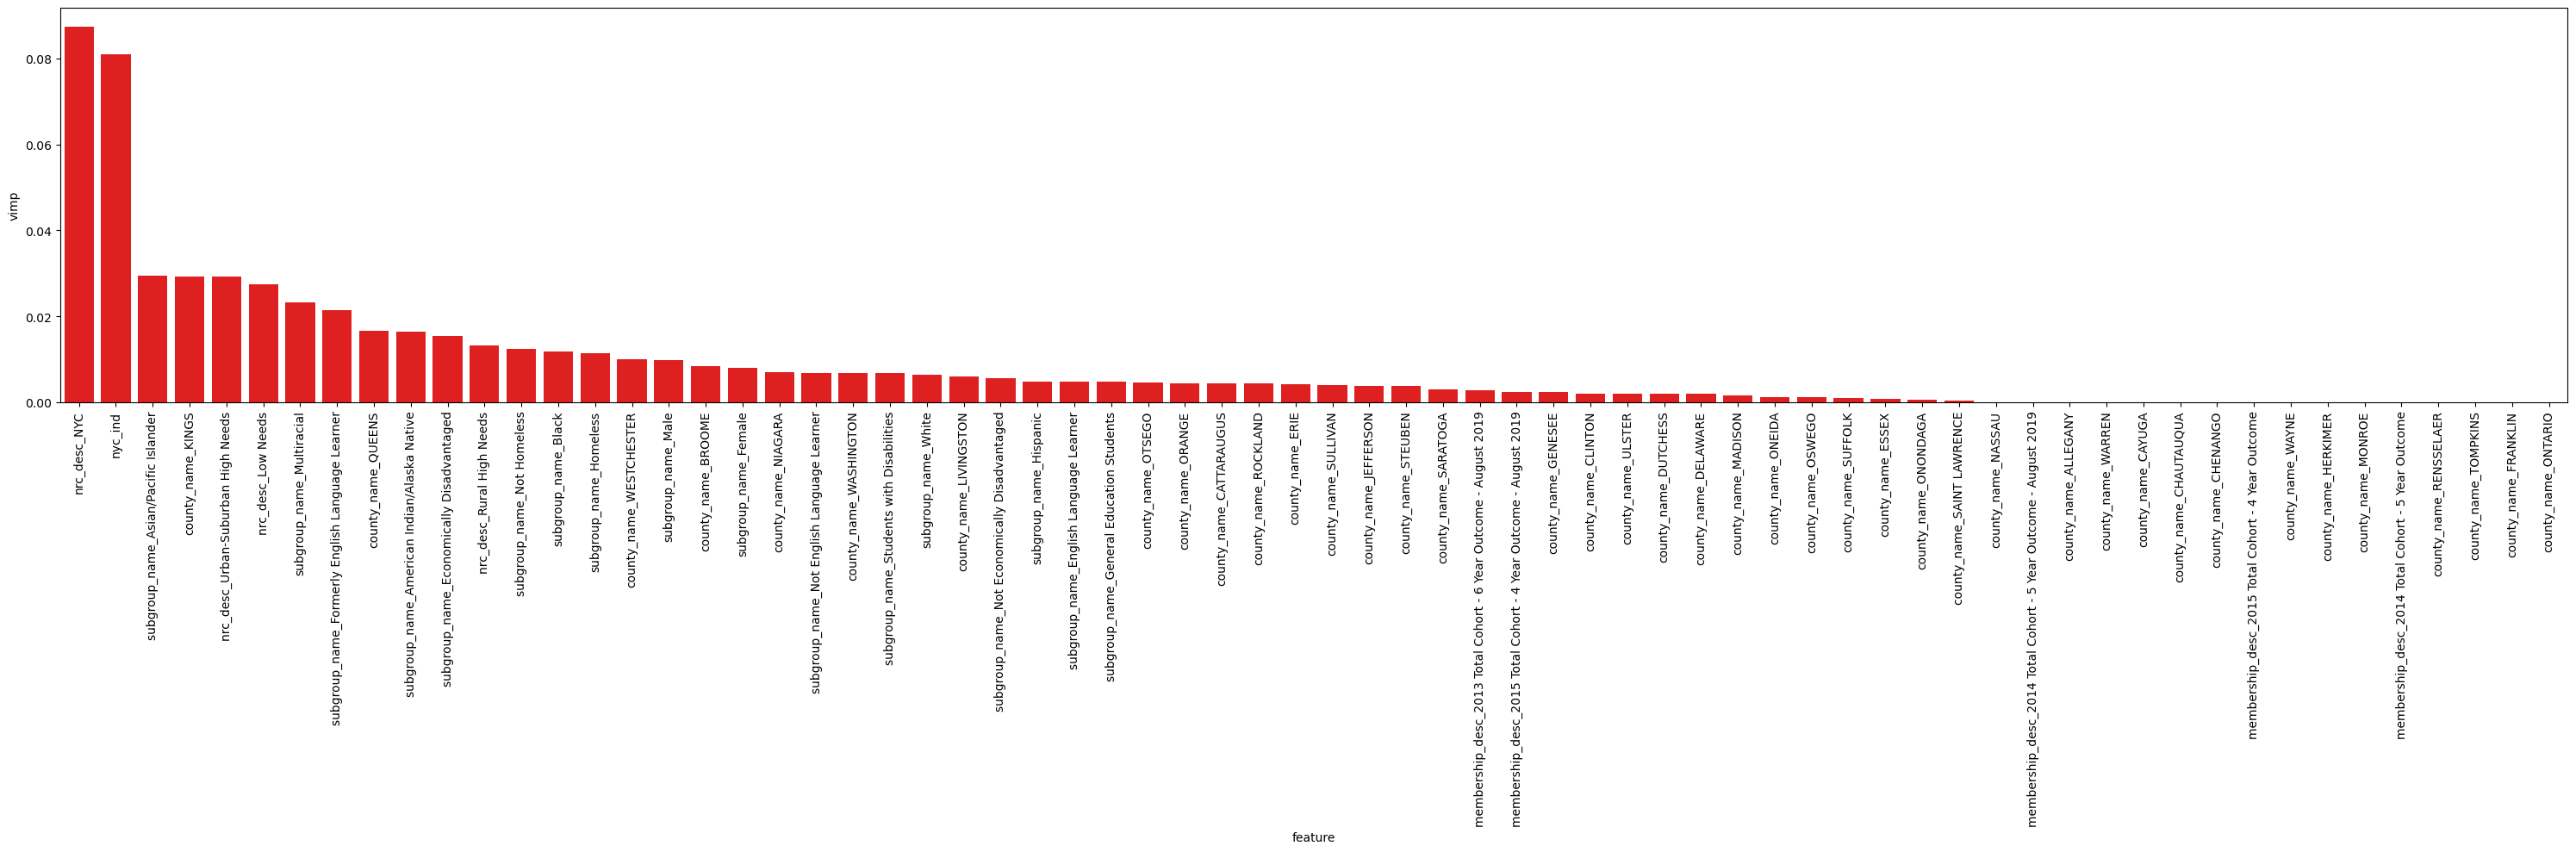

In [50]:
mic_df = pd.DataFrame({"feature": X_train_cat.columns, "vimp": mic}).sort_values(by="vimp", ascending=False)

plt.figure(figsize=(30, 10))
sns.barplot(data = mic_df, x='feature', y='vimp', color='red')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [51]:
# selected_top_columns = mic_df["feature"].head(20)
# X_train_cat_new = X_train_cat[selected_top_columns].reset_index(drop = True)
# X_train_cat_new.head()

selected_top_columns =  SelectPercentile(mutual_info_regression, percentile=20)

selected_top_columns.fit(X_train_cat, y_train)

X_train_cat_new = X_train_cat[X_train_cat.columns[selected_top_columns.get_support()]].reset_index(drop = True)

X_train_cat_new.head()

,nyc_ind,nrc_desc_Low Needs,nrc_desc_NYC,nrc_desc_Rural High Needs,nrc_desc_Urban-Suburban High Needs,county_name_KINGS,county_name_QUEENS,subgroup_name_American Indian/Alaska Native,subgroup_name_Asian/Pacific Islander,subgroup_name_Black,subgroup_name_Formerly English Language Learner,subgroup_name_Male,subgroup_name_Multiracial,subgroup_name_Not English Language Learner
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,1,0,0,0,0,0,0,0,0


# Dimensionality Reduction

## Principal Component Analysis

PCA (Principal Component Analysis) is implemented using libraries like scikit-learn, reducing the dimensionality of a dataset by transforming it into its principal components for improved efficiency and simplicity in machine learning applications.

In [52]:
# Fetch the numeric columns
X_train_num = X_train[['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt']]

# Standardize the data
stanardized_data = StandardScaler().fit_transform(X_train_num)

pd.DataFrame(stanardized_data, columns = X_train_num.columns).head()

,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt
0,-1.390545,-1.472860,-1.076804,-1.169235,-1.279861,-0.639168,-0.858346
1,0.489961,0.494233,0.518867,0.720410,0.369499,-0.639168,1.281022
2,-0.751590,-0.785321,-1.076804,-0.684876,-0.774718,-0.639168,0.339154
3,0.283566,0.036284,0.696199,0.305545,-0.774718,1.782541,1.588410
4,1.684360,1.583657,1.944303,1.732850,1.018060,1.809404,1.873638


In [53]:
# Fit the standardized data into PCA object
pca = PCA().fit(stanardized_data)
print('Explained variation per principal component:\n{}'.format(pca.explained_variance_ratio_))

Explained variation per principal component:
[0.75574408 0.10415472 0.07192278 0.04074816 0.02145864 0.00471539
 0.00125624]


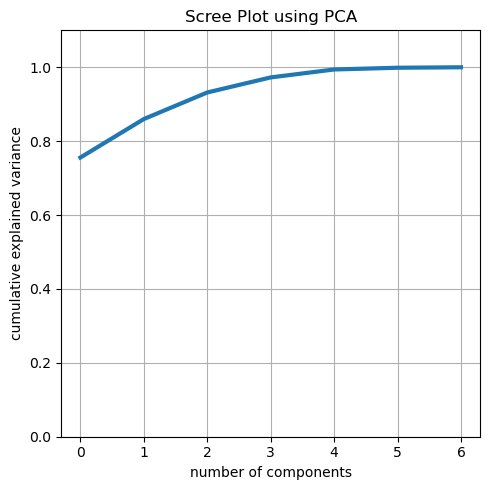

In [54]:
# Scree plot 1

plt.figure(figsize=(5, 5))

# Set y-axis limits
plt.ylim(0.0, 1.1)

# Plot the cumulative explained variance using the explained_variance_ratio_ from PCA
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=3)

# Label the axis and title
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Scree Plot using PCA')

# display plot
plt.grid()
plt.tight_layout()
plt.show()

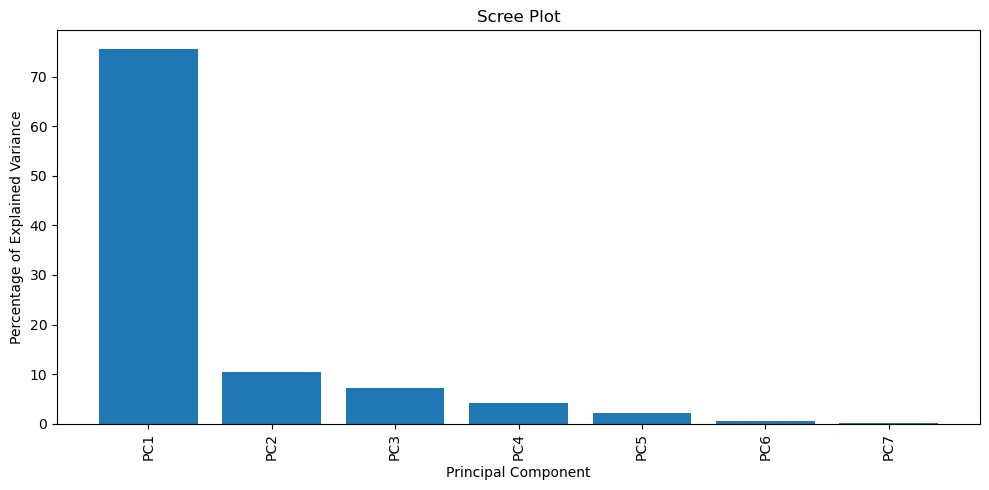

In [55]:
# Scree plot 2

# Calculate and round the percentage of explained variance for each principal component
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

# Generate labels for each principal component
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

# Create a bar plot with the percentage of explained variance for each principal component
plt.figure(figsize=(10, 5))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)

# Label the axis and title
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(rotation = 90)
plt.title('Scree Plot')

#display plot
plt.tight_layout()
plt.show()

From the scree plots above, we can observe that the first 2 PCA components explains more than 80% of variability in the data. Hence, lets use the first 2 PCA components for our model

In [56]:
# Create a PCA object specifying the number of components
n = 2
pca = PCA(n_components = n)

# Create list for pca column names
pca_cols = ['pc'+str(i) for i in range(1,n+1)]

# Fit the PCA model to the standardized data and obtain PCA coordinates
pca_data = pca.fit_transform(stanardized_data)

pca_X_num = pd.DataFrame(data=pca_data, columns=pca_cols)
pca_X_num.head()

,pc1,pc2
0,-3.044633,0.308888
1,1.297437,-0.573208
2,-1.694837,0.025214
3,1.255447,2.127436
4,4.339688,0.983945


### Combine the categorical and numeric columns

In [57]:
X_train_new = pd.concat([pca_X_num, X_train_cat_new], axis=1)

X_train_new.head()

,pc1,pc2,nyc_ind,nrc_desc_Low Needs,nrc_desc_NYC,nrc_desc_Rural High Needs,nrc_desc_Urban-Suburban High Needs,county_name_KINGS,county_name_QUEENS,subgroup_name_American Indian/Alaska Native,subgroup_name_Asian/Pacific Islander,subgroup_name_Black,subgroup_name_Formerly English Language Learner,subgroup_name_Male,subgroup_name_Multiracial,subgroup_name_Not English Language Learner
0,-3.044633,0.308888,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.297437,-0.573208,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.694837,0.025214,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1.255447,2.127436,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,4.339688,0.983945,1,0,1,0,0,1,0,0,0,0,0,0,0,0


In [58]:
X_train_new.shape

(57331, 16)

# Handling the Inconsistancies in datatypes and index

In [59]:
# Convert 'nyc_ind' column to integer type in X_train_new
X_train_new['nyc_ind'] = X_train_new['nyc_ind'].astype(int)

# Reset the indices of both X_train_new and y_train to avoid index misalignment
X_train_new = X_train_new.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Apply the feature selection and transformation methods on the test data

In [60]:
#Select the Variance Threshold, mutual info regression resulted columns on test data
X_test_cat = X_test[X_train_cat_new.columns]
X_test_cat.reset_index(drop = True, inplace = True)

X_test_cat.head()

,nyc_ind,nrc_desc_Low Needs,nrc_desc_NYC,nrc_desc_Rural High Needs,nrc_desc_Urban-Suburban High Needs,county_name_KINGS,county_name_QUEENS,subgroup_name_American Indian/Alaska Native,subgroup_name_Asian/Pacific Islander,subgroup_name_Black,subgroup_name_Formerly English Language Learner,subgroup_name_Male,subgroup_name_Multiracial,subgroup_name_Not English Language Learner
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
# Apply PCA on test data

#Standardize the test data
X_test_num = X_test[['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt']]
stanardized_test_data = StandardScaler().fit_transform(X_test_num)

# Create a PCA object specifying the number of components
n = 2
pca = PCA(n_components = n)
# Create list for pca column names
pca_cols = ['pc'+str(i) for i in range(1,n+1)]
# Fit the PCA model to the standardized data and obtain PCA coordinates
pca_data = pca.fit_transform(stanardized_test_data)
pca_test_num = pd.DataFrame(data=pca_data, columns=pca_cols)

pca_test_num.head()

,pc1,pc2
0,-0.139191,-0.644145
1,-0.369637,-0.915387
2,4.443513,0.336210
3,0.906814,0.835431
4,3.522512,0.215690


In [62]:
# Join both categorical and numerical test data
X_test_new = pd.concat([pca_test_num, X_test_cat], axis=1)
X_test_new['nyc_ind'] = X_train_new['nyc_ind'].astype(int)

X_test_new.head()

,pc1,pc2,nyc_ind,nrc_desc_Low Needs,nrc_desc_NYC,nrc_desc_Rural High Needs,nrc_desc_Urban-Suburban High Needs,county_name_KINGS,county_name_QUEENS,subgroup_name_American Indian/Alaska Native,subgroup_name_Asian/Pacific Islander,subgroup_name_Black,subgroup_name_Formerly English Language Learner,subgroup_name_Male,subgroup_name_Multiracial,subgroup_name_Not English Language Learner
0,-0.139191,-0.644145,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.369637,-0.915387,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,4.443513,0.336210,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0.906814,0.835431,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3.522512,0.215690,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# Regression Modelling

## 1) Multiple Linear Regression Model

### Model 1.1

In [63]:
# Add a constant to the feature matrix
X_train_new_ols = sm.add_constant(X_train_new)
# Fit the linear regression model
ols_model_1 = sm.OLS(y_train, X_train_new_ols).fit()

# Print the summary of the regression
print(ols_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:            dropout_cnt   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     2357.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:30:07   Log-Likelihood:            -2.7602e+05
No. Observations:               57331   AIC:                         5.521e+05
Df Residuals:                   57315   BIC:                         5.522e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

### Model 1.2

In [64]:
# Fit the linear regression model
ols_model_2 = sm.OLS(y_train, X_train_new_ols[['pc1','pc2']]).fit()

# Print the summary of the regression
print(ols_model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:            dropout_cnt   R-squared (uncentered):                   0.180
Model:                            OLS   Adj. R-squared (uncentered):              0.180
Method:                 Least Squares   F-statistic:                              6273.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):                        0.00
Time:                        19:30:07   Log-Likelihood:                     -2.8585e+05
No. Observations:               57331   AIC:                                  5.717e+05
Df Residuals:                   57329   BIC:                                  5.717e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Model 1.3

In [65]:
# Fit the linear regression model
ols_model_3 = sm.OLS(y_train, X_train_new_ols[['pc1','pc2','nyc_ind']]).fit()

# Print the summary of the regression
print(ols_model_3.summary())

                                 OLS Regression Results                                
Dep. Variable:            dropout_cnt   R-squared (uncentered):                   0.367
Model:                            OLS   Adj. R-squared (uncentered):              0.367
Method:                 Least Squares   F-statistic:                          1.109e+04
Date:                Sun, 25 Feb 2024   Prob (F-statistic):                        0.00
Time:                        19:30:07   Log-Likelihood:                     -2.7841e+05
No. Observations:               57331   AIC:                                  5.568e+05
Df Residuals:                   57328   BIC:                                  5.568e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Model Comparison: Multiple Linear regression model

| Metric                 | Model       |
|------------------------|-------------|
| High R-squared         | Model 1.1   |
| High Adjusted R-squared| Model 1.1   |
| High F-Statistic       | Model 1.3   |
| High Log-Likelihood    | Model 1.1   |
| Low AIC                | Model 1.1   |
| Low BIC                | Model 1.1   |

__Model 1.1 is performing best among the 3 models.__



## 2) Poisson Regression Model

### Model 2.1

In [66]:
# Fit Poisson regression model using Generalized Linear Model (GLM)
poisson_model_1 = sm.GLM(y_train, X_train_new, family=sm.families.Poisson()).fit()

# Print the summary of the Poisson regression model
print(poisson_model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                57331
Model:                            GLM   Df Residuals:                    57316
Model Family:                 Poisson   Df Model:                           14
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.1727e+05
Date:                Sun, 25 Feb 2024   Deviance:                   3.1954e+05
Time:                        19:30:08   Pearson chi2:                 5.68e+05
No. Iterations:                     9   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Create a 2nd model with features having high coef

### Model 2.2

In [67]:
# Fit Poisson regression model using Generalized Linear Model (GLM)
poisson_model_2 = sm.GLM(y_train, X_train_new[['pc1','pc2','nyc_ind',
                                             'nrc_desc_Urban-Suburban High Needs',
                                             'subgroup_name_American Indian/Alaska Native']], family=sm.families.Poisson()).fit()

# Print the summary of the Poisson regression model
print(poisson_model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                57331
Model:                            GLM   Df Residuals:                    57326
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.4117e+05
Date:                Sun, 25 Feb 2024   Deviance:                   3.6734e+05
Time:                        19:30:08   Pearson chi2:                 5.88e+05
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Create a 3rd model with 2 features having high coef

### Model 2.3

In [68]:
# Fit Poisson regression model using Generalized Linear Model (GLM)
poisson_model_3 = sm.GLM(y_train, X_train_new[['pc1','nyc_ind']], family=sm.families.Poisson()).fit()

# Print the summary of the Poisson regression model
print(poisson_model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                57331
Model:                            GLM   Df Residuals:                    57329
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.6686e+05
Date:                Sun, 25 Feb 2024   Deviance:                   4.1872e+05
Time:                        19:30:08   Pearson chi2:                 7.26e+05
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pc1            0.8891      0.001   1534.921      0.0

| Metric                 | Model       |
|------------------------|-------------|
| High Log-Likelihood    | Model 2.1   |
| Low Deviance           | Model 2.1   |
| Low chi2               | Model 2.1   |


__Model 2.1 is performing best among the 3 models.__

To begin with Negative binomial regression model, we need alpha value. To calculate alpha value we are going to use the best performing possion regression model's regression to fit a auxially ols model which helps in finding the best alpha value.

In [69]:
poisson_prediction = poisson_model_1.get_prediction(X_test_new)
#summary_frame() returns a pandas DataFrame
poisson_predictions_summary_frame = poisson_prediction.summary_frame()
poisson_prediction = poisson_predictions_summary_frame['mean']

## 3) Negative Binomial Regression Model

### Alpha Value Calculation

In [70]:
def test_overdispersion(mu, y, X_test_new):
    """
    Test for under- or overdispersion of a Poisson model using an auxiliary OLS regression.

    Parameters:
    - mu: Predicted means (fitted values) from a Poisson model.
    - y: Actual response variable.
    - X_test_new: Independent variable for the auxiliary OLS regression.

    Returns:
    - alpha_hat: Estimated alpha value from the overdispersion test.
    """

    #Calculate Residuals
    residuals = y - mu

    #Fit Auxiliary OLS Model
    aux_model = sm.OLS(residuals, X_test_new).fit()

    #Extract Alpha Parameter
    alpha_hat = aux_model.params[0]

    #Return Alpha Value
    return alpha_hat


# Get the alpha value using the overdispersion test
alpha_value = test_overdispersion(poisson_prediction, y_test.reset_index(drop = True), X_test_new)
print(f"Estimated alpha value: {alpha_value}")

Estimated alpha value: 0.23782568636407247


### Model 3.1

In [71]:
#train the NB2 model on the training data set
nbr_model_1 = sm.GLM(y_train, X_train_new,family=sm.families.NegativeBinomial(alpha=alpha_value)).fit()

#print the training summary
print(nbr_model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                57331
Model:                            GLM   Df Residuals:                    57316
Model Family:        NegativeBinomial   Df Model:                           14
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1962e+05
Date:                Sun, 25 Feb 2024   Deviance:                       92815.
Time:                        19:30:09   Pearson chi2:                 2.26e+05
No. Iterations:                    13   Pseudo R-squ. (CS):             0.9994
Covariance Type:            nonrobust                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Create a 2nd model with features having high coef

### Model 3.2

In [72]:
#train the NB2 model on the training data set
nbr_model_2 = sm.GLM(y_train, X_train_new[['pc1','nyc_ind',
                                           'subgroup_name_Formerly English Language Learner',
                                           'subgroup_name_Asian/Pacific Islander']],family=sm.families.NegativeBinomial(alpha=alpha_value)).fit()

#print the training summary
print(nbr_model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                57331
Model:                            GLM   Df Residuals:                    57327
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3399e+05
Date:                Sun, 25 Feb 2024   Deviance:                   1.2154e+05
Time:                        19:30:09   Pearson chi2:                 3.30e+05
No. Iterations:                    12   Pseudo R-squ. (CS):             0.9991
Covariance Type:            nonrobust                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Create a 3rd model with top two features having high coef

### Model 3.3

In [73]:
#train the NB2 model on the training data set
nbr_model_3 = sm.GLM(y_train, X_train_new[['pc1','nyc_ind']],family=sm.families.NegativeBinomial(alpha=alpha_value)).fit()

#print the training summary
print(nbr_model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                57331
Model:                            GLM   Df Residuals:                    57329
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3426e+05
Date:                Sun, 25 Feb 2024   Deviance:                   1.2210e+05
Time:                        19:30:09   Pearson chi2:                 3.27e+05
No. Iterations:                    12   Pseudo R-squ. (CS):             0.9991
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pc1            0.8512      0.002    548.210      0.0

| Metric                 | Model       |
|------------------------|-------------|
| High Log-Likelihood    | Model 3.1   |
| Low Deviance           | Model 3.1   |
| Low chi2               | Model 3.1   |


__Model 3.1 is performing best among the 3 models.__

# Select Models

## Multiple Linear Regresion

In [74]:
# Add a constant to the feature matrix for the test set
X_test_new_ols = sm.add_constant(X_test_new)
ols_prediction = ols_model_1.predict(X_test_new_ols)

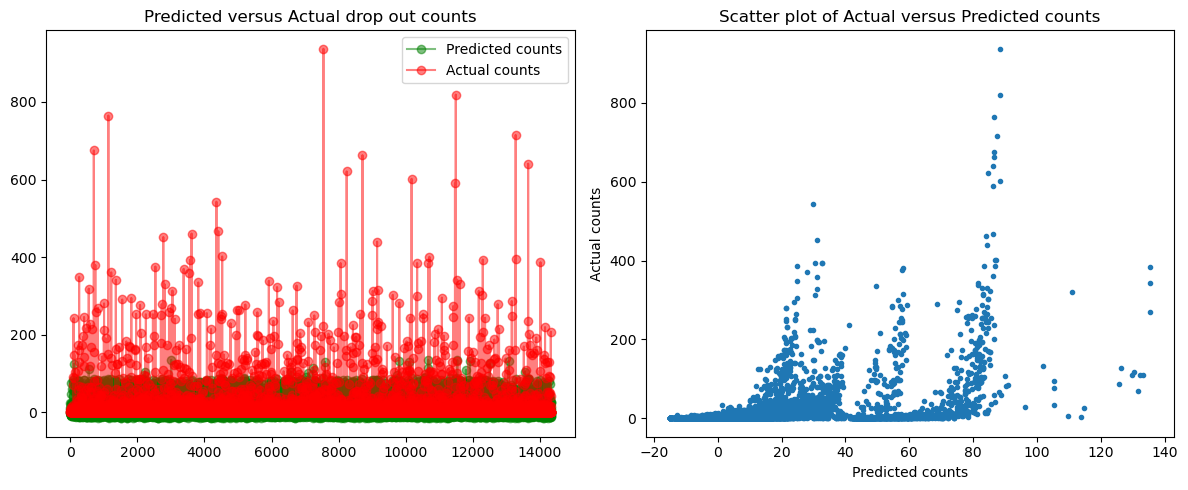

In [75]:
# Get the actual counts from the y_test
actual_counts = y_test

# Create a new figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot 1: Predicted versus Actual Counts
axes[0].set_title('Predicted versus Actual drop out counts')
predicted, = axes[0].plot(X_test_new.index, ols_prediction, 'go-', label='Predicted counts', alpha = 0.5)
actual, = axes[0].plot(X_test_new.index, actual_counts, 'ro-', label='Actual counts', alpha = 0.5)
axes[0].legend(handles=[predicted, actual])

# Plot 2: Scatter plot of Actual versus Predicted Counts
axes[1].set_title('Scatter plot of Actual versus Predicted counts')
axes[1].scatter(x=ols_prediction, y=actual_counts, marker='.')
axes[1].set_xlabel('Predicted counts')
axes[1].set_ylabel('Actual counts')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()

In [76]:
# Calculate R-squared
r_squared = r2_score(y_test, ols_prediction)
print(f"R-squared: {r_squared}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, ols_prediction)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, ols_prediction)
print(f"Mean Squared Error (MSE): {mse}")

R-squared: 0.21441445588630803
Mean Absolute Error (MAE): 13.050545786507353
Mean Squared Error (MSE): 1078.1583458952132


Linear regression models generates negative values. Since our response variable is a non-negative integer, use of a linear regression model would not be appropriate for purposes of estimating the number of dropouts.

## Poisson Regression

In [77]:
poisson_prediction = poisson_model_1.get_prediction(X_test_new)
#summary_frame() returns a pandas DataFrame
poisson_predictions_summary_frame = poisson_prediction.summary_frame()
print(poisson_predictions_summary_frame)

             mean   mean_se  mean_ci_lower  mean_ci_upper
0        0.875658  0.004538       0.866808       0.884597
1        0.221059  0.001962       0.217248       0.224938
2       15.578641  0.134138      15.317942      15.843776
3        2.363685  0.004046       2.355768       2.371628
4       34.775774  0.055373      34.667413      34.884473
...           ...       ...            ...            ...
14328  139.581562  0.689381     138.236918     140.939286
14329    0.079743  0.002226       0.075497       0.084228
14330    2.992224  0.017344       2.958423       3.026410
14331    0.110850  0.003093       0.104951       0.117080
14332    0.564721  0.002145       0.560532       0.568941

[14333 rows x 4 columns]


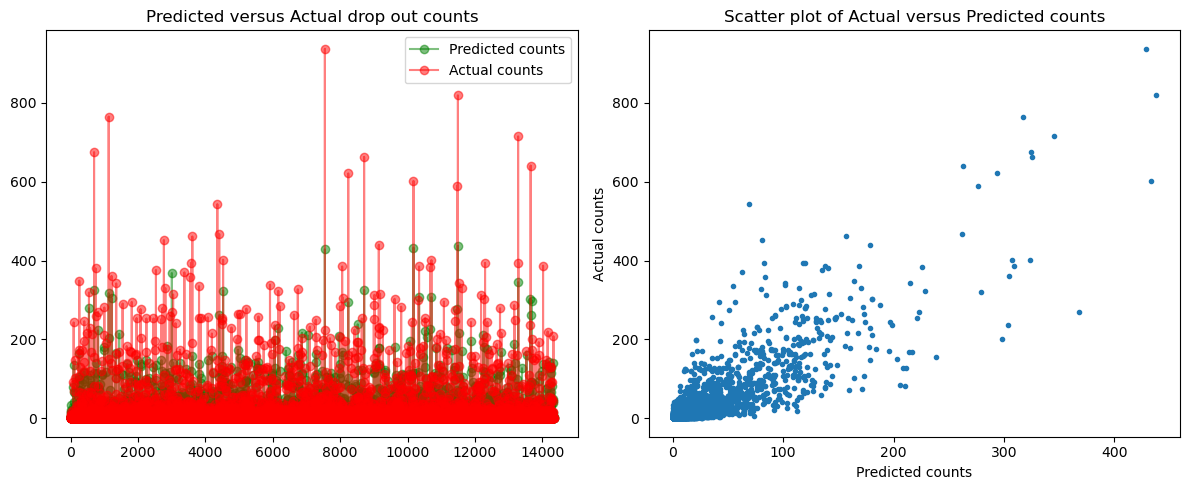

In [78]:
# Extract the predicted counts from the predictions_summary_frame
poisson_prediction = poisson_predictions_summary_frame['mean']
# Get the actual counts from the y_test
actual_counts = y_test

# Create a new figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot 1: Predicted versus Actual Counts
axes[0].set_title('Predicted versus Actual drop out counts')
predicted, = axes[0].plot(X_test_new.index, poisson_prediction, 'go-', label='Predicted counts', alpha = 0.5)
actual, = axes[0].plot(X_test_new.index, actual_counts, 'ro-', label='Actual counts',  alpha = 0.5)
axes[0].legend(handles=[predicted, actual])

# Plot 2: Scatter plot of Actual versus Predicted Counts
axes[1].set_title('Scatter plot of Actual versus Predicted counts')
axes[1].scatter(x=poisson_prediction, y=actual_counts, marker='.')
axes[1].set_xlabel('Predicted counts')
axes[1].set_ylabel('Actual counts')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()


In [79]:
# Calculate R-squared
r_squared = r2_score(y_test, poisson_prediction)
print(f"R-squared: {r_squared}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, poisson_prediction)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, poisson_prediction)
print(f"Mean Squared Error (MSE): {mse}")

R-squared: 0.6718362094017416
Mean Absolute Error (MAE): 5.410132115015782
Mean Squared Error (MSE): 450.3806521201933


## Negative Binomial Regression

In [80]:
#make some predictions using our trained NB2 model
nbr_prediction = nbr_model_1.get_prediction(X_test_new)

#print out the predictions
nbr_predictions_summary_frame = nbr_prediction.summary_frame()
print(nbr_predictions_summary_frame)

             mean   mean_se  mean_ci_lower  mean_ci_upper
0        0.980556  0.013204       0.955015       1.006780
1        0.333565  0.004119       0.325588       0.341737
2       15.679710  0.195903      15.300411      16.068412
3        2.159299  0.007845       2.143977       2.174731
4       32.942406  0.284988      32.388549      33.505735
...           ...       ...            ...            ...
14328  120.273668  2.461887     115.543966     125.196976
14329    0.082296  0.003350       0.075985       0.089131
14330    3.337009  0.030879       3.277032       3.398083
14331    0.111492  0.004534       0.102951       0.120742
14332    0.578722  0.004525       0.569921       0.587660

[14333 rows x 4 columns]


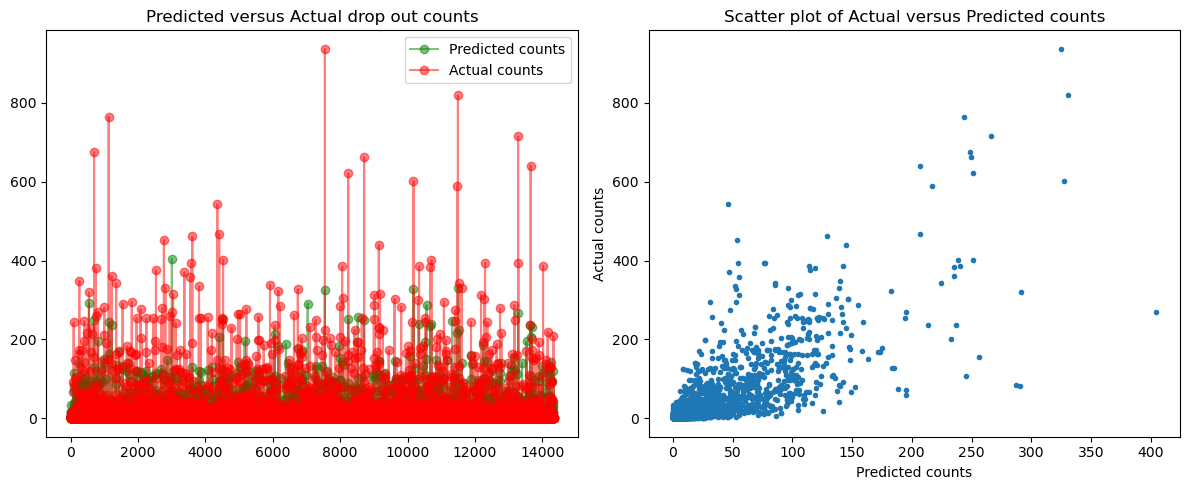

In [81]:
# Extract the predicted counts from the predictions_summary_frame
nbr_predicted_counts=nbr_predictions_summary_frame['mean']
# Get the actual counts from the y_test
actual_counts = y_test

# Create a new figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot 1: Predicted versus Actual Counts
axes[0].set_title('Predicted versus Actual drop out counts')
predicted, = axes[0].plot(X_test_new.index, nbr_predicted_counts, 'go-', label='Predicted counts',  alpha = 0.5)
actual, = axes[0].plot(X_test_new.index, actual_counts, 'ro-', label='Actual counts',  alpha = 0.5)
axes[0].legend(handles=[predicted, actual])

# Plot 2: Scatter plot of Actual versus Predicted Counts
axes[1].set_title('Scatter plot of Actual versus Predicted counts')
axes[1].scatter(x=nbr_predicted_counts, y=actual_counts, marker='.')
axes[1].set_xlabel('Predicted counts')
axes[1].set_ylabel('Actual counts')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()


In [82]:
# Calculate R-squared
r_squared = r2_score(y_test, nbr_predicted_counts)
print(f"R-squared: {r_squared}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, nbr_predicted_counts)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, nbr_predicted_counts)
print(f"Mean Squared Error (MSE): {mse}")

R-squared: 0.5912372012888119
Mean Absolute Error (MAE): 5.70712121693489
Mean Squared Error (MSE): 560.9968592525065


__Insights:__

Linear regression models generates negative values. Since our response variable is a non-negative integer, use of a linear regression model would not be appropriate for purposes of estimating the number of dropouts.

It is evident that the R-square value is higher and Mean Squared Error is lesser for poisson regression model when compared to negative binomial regression model suggesting that it is the best choice model.

# Conclusion

After a thorough examination of the dataset, we effectively managed a significant volume of null values by leveraging domain knowledge, ensuring a balanced approach to avoid bias and information loss. Subsequently, categorical columns were encoded, and we streamlined the feature set using techniques like variance thresholding, Mutual Information Regression, and Principal Component Analysis (PCA).

Then the three different sets of feature is selected and each set is fitted into multiple regression, poisson and negative binomial model and the best performing feature set and model is selected with help of summary statistics. Following this, we proceeded to predict dropout counts for each model and calculated performance metrics. Visual representations of actual versus predicted values were generated to enhance understanding. 

In the end, we found that the __Poisson regression model__ outperformed others, showing better results across various measures. This confirms its effectiveness and makes it the top choice in this case.